In [2]:
import scanpy as sc
import pandas as pd
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import rc_context
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams["font.sans-serif"] = "Arial"
%config InlineBackend.figure_format = 'retina'
sc.settings.set_figure_params(dpi=50, dpi_save=300, figsize=(10, 10),color_map='Reds')

### metadata的

In [3]:
adata=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/NewAtlas/atlas_level3.h5ad')

In [4]:
adata

AnnData object with n_obs × n_vars = 589101 × 19346
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Lineage', 'CellType', 'lym', 'level3', 'Dataset', 'segment', 'stage', 'weaned', 'Disease', 'gender', 'region', 'breed', 'project'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'CellType_colors', 'Lineage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'level3_colors', 'lym_colors', 'majority_voting_colors', 'neighbors', 'project_colors', 'tsne', 'umap'
    obsm: 'X_scVI', 'X_tsne', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [5]:
meta=pd.read_csv('/disk212/yupf/database/scRNA-seq/NewAtlas/GEO_metadata.csv')

In [6]:
meta.columns

Index(['Dataset', 'segment', 'stage', 'weaned', 'Disease', 'gender', 'region',
       'breed', 'origin cells', 'qc-passed cells', 'filtered cells',
       'filted fraction', 'project'],
      dtype='object')

In [7]:
meta=meta[['Dataset', 'segment', 'stage', 'weaned', 'Disease', 'gender', 'region',
       'breed', 'project']]

In [8]:
meta

Dataset segment stage  weaned Disease  gender    region  \
0           CNP0002165   Mixed  180d   after     NaN     NaN     Mixed   
1   PRJNA681248_ileum0   ileum    0d  before     NaN     NaN  SmallInt   
2   PRJNA681248_ileum1   ileum    1d  before     NaN     NaN  SmallInt   
3   PRJNA681248_ileum3   ileum    3d  before     NaN     NaN  SmallInt   
4   PRJNA681248_ileum7   ileum    7d  before     NaN     NaN  SmallInt   
..                 ...     ...   ...     ...     ...     ...       ...   
74    PRJNA859792_IPP4   ileum   49d   after     NaN    male  SmallInt   
75   PRJNA859792_NoPP1   ileum   49d   after     NaN  female  SmallInt   
76   PRJNA859792_NoPP2   ileum   49d   after     NaN  female  SmallInt   
77   PRJNA859792_NoPP4   ileum   49d   after     NaN    male  SmallInt   
78                 NaN     NaN   NaN     NaN     NaN     NaN       NaN   

          breed      project  
0           DLY   CNP0002165  
1   large white  PRJNA681248  
2   large white  PRJNA681248  
3   large white  PRJNA681248  
4   large white  PRJNA681248  
..          ...          ...  
74        Mixed  PRJNA859792  
75        Mixed  PRJNA859792  
76        Mixed  PRJNA859792  
77        Mixed  PRJNA859792  
78          NaN  PRJNA859792  

[79 rows x 9 columns]

In [ ]:
def map_meta(x,df)
    x=df['Dataset']

In [9]:
len(adata.obs['project'].cat.categories.to_list())

78

In [10]:
adata.obs

doublet_score  predicted_doublet  \
AAACCCAAGAGTTGAT-1_CNP0002165              0.058716              False   
AAACCCAAGCAACTTC-1_CNP0002165              0.053265              False   
AAACCCAAGCAGTCTT-1_CNP0002165              0.025098              False   
AAACCCAAGCGCATCC-1_CNP0002165              0.113619              False   
AAACCCAAGGGTAGCT-1_CNP0002165              0.066667              False   
...                                             ...                ...   
TTTGTTGCAATCGCCG-1_PRJNA859792_NoPP4       0.019547              False   
TTTGTTGGTACCTAGT-1_PRJNA859792_NoPP4       0.047619              False   
TTTGTTGGTACTAAGA-1_PRJNA859792_NoPP4       0.055249              False   
TTTGTTGGTTTCGCTC-1_PRJNA859792_NoPP4       0.087416              False   
TTTGTTGTCAGTGTCA-1_PRJNA859792_NoPP4       0.029328              False   

                                      n_genes  n_genes_by_counts  \
AAACCCAAGAGTTGAT-1_CNP0002165             894                893   
AAACCCAAGCAACTTC-1_CNP0002165            2271               2271   
AAACCCAAGCAGTCTT-1_CNP0002165             703                703   
AAACCCAAGCGCATCC-1_CNP0002165            2098               2098   
AAACCCAAGGGTAGCT-1_CNP0002165             582                582   
...                                       ...                ...   
TTTGTTGCAATCGCCG-1_PRJNA859792_NoPP4      241                241   
TTTGTTGGTACCTAGT-1_PRJNA859792_NoPP4      482                478   
TTTGTTGGTACTAAGA-1_PRJNA859792_NoPP4      756                755   
TTTGTTGGTTTCGCTC-1_PRJNA859792_NoPP4      886                882   
TTTGTTGTCAGTGTCA-1_PRJNA859792_NoPP4      218                217   

                                      total_counts  total_counts_mt  \
AAACCCAAGAGTTGAT-1_CNP0002165               2514.0            417.0   
AAACCCAAGCAACTTC-1_CNP0002165               9795.0           1330.0   
AAACCCAAGCAGTCTT-1_CNP0002165               2345.0            324.0   
AAACCCAAGCGCATCC-1_CNP0002165               6473.0            387.0   
AAACCCAAGGGTAGCT-1_CNP0002165                989.0            203.0   
...                                            ...              ...   
TTTGTTGCAATCGCCG-1_PRJNA859792_NoPP4         284.0             16.0   
TTTGTTGGTACCTAGT-1_PRJNA859792_NoPP4         594.0             29.0   
TTTGTTGGTACTAAGA-1_PRJNA859792_NoPP4        1218.0            184.0   
TTTGTTGGTTTCGCTC-1_PRJNA859792_NoPP4        1457.0             57.0   
TTTGTTGTCAGTGTCA-1_PRJNA859792_NoPP4         247.0             17.0   

                                      pct_counts_mt            project  \
AAACCCAAGAGTTGAT-1_CNP0002165             16.587112         CNP0002165   
AAACCCAAGCAACTTC-1_CNP0002165             13.578357         CNP0002165   
AAACCCAAGCAGTCTT-1_CNP0002165             13.816631         CNP0002165   
AAACCCAAGCGCATCC-1_CNP0002165              5.978681         CNP0002165   
AAACCCAAGGGTAGCT-1_CNP0002165             20.525784         CNP0002165   
...                                             ...                ...   
TTTGTTGCAATCGCCG-1_PRJNA859792_NoPP4       5.633803  PRJNA859792_NoPP4   
TTTGTTGGTACCTAGT-1_PRJNA859792_NoPP4       4.882155  PRJNA859792_NoPP4   
TTTGTTGGTACTAAGA-1_PRJNA859792_NoPP4      15.106731  PRJNA859792_NoPP4   
TTTGTTGGTTTCGCTC-1_PRJNA859792_NoPP4       3.912148  PRJNA859792_NoPP4   
TTTGTTGTCAGTGTCA-1_PRJNA859792_NoPP4       6.882591  PRJNA859792_NoPP4   

                                       S_score  G2M_score  ... _scvi_labels  \
AAACCCAAGAGTTGAT-1_CNP0002165         0.000865  -0.087169  ...            0   
AAACCCAAGCAACTTC-1_CNP0002165        -0.059540  -0.149325  ...            0   
AAACCCAAGCAGTCTT-1_CNP0002165         0.079098   0.246759  ...            0   
AAACCCAAGCGCATCC-1_CNP0002165         0.279473  -0.142561  ...            0   
AAACCCAAGGGTAGCT-1_CNP0002165        -0.127839  -0.120298  ...            0   
...                                        ...        ...  ...          ...   
TTTGTTGCAATCGCCG-1_PRJNA859792_NoPP4 

In [11]:
adata.obs['level3'].value_counts()

T cells              167931
B cells              156928
Enterocytes          110100
Myeloid               28982
Crypt                 22134
Goblet                20086
Plasma cells          19565
ILC                   16418
BEST4 enterocytes     12179
Tuft                  10904
Mesenchymal            9158
Endothelial            6484
EECs                   4980
Neuron                 2233
Microfold               803
Red blood               216
Name: level3, dtype: int64

In [12]:
df2=adata.obs
df1=meta

In [13]:
merged_df = pd.merge(df2, df1, left_on='project', right_on='Dataset')

In [14]:
merged_df.index=adata.obs.index

In [15]:
merged_df

doublet_score  predicted_doublet  \
AAACCCAAGAGTTGAT-1_CNP0002165              0.058716              False   
AAACCCAAGCAACTTC-1_CNP0002165              0.053265              False   
AAACCCAAGCAGTCTT-1_CNP0002165              0.025098              False   
AAACCCAAGCGCATCC-1_CNP0002165              0.113619              False   
AAACCCAAGGGTAGCT-1_CNP0002165              0.066667              False   
...                                             ...                ...   
TTTGTTGCAATCGCCG-1_PRJNA859792_NoPP4       0.019547              False   
TTTGTTGGTACCTAGT-1_PRJNA859792_NoPP4       0.047619              False   
TTTGTTGGTACTAAGA-1_PRJNA859792_NoPP4       0.055249              False   
TTTGTTGGTTTCGCTC-1_PRJNA859792_NoPP4       0.087416              False   
TTTGTTGTCAGTGTCA-1_PRJNA859792_NoPP4       0.029328              False   

                                      n_genes  n_genes_by_counts  \
AAACCCAAGAGTTGAT-1_CNP0002165             894                893   
AAACCCAAGCAACTTC-1_CNP0002165            2271               2271   
AAACCCAAGCAGTCTT-1_CNP0002165             703                703   
AAACCCAAGCGCATCC-1_CNP0002165            2098               2098   
AAACCCAAGGGTAGCT-1_CNP0002165             582                582   
...                                       ...                ...   
TTTGTTGCAATCGCCG-1_PRJNA859792_NoPP4      241                241   
TTTGTTGGTACCTAGT-1_PRJNA859792_NoPP4      482                478   
TTTGTTGGTACTAAGA-1_PRJNA859792_NoPP4      756                755   
TTTGTTGGTTTCGCTC-1_PRJNA859792_NoPP4      886                882   
TTTGTTGTCAGTGTCA-1_PRJNA859792_NoPP4      218                217   

                                      total_counts  total_counts_mt  \
AAACCCAAGAGTTGAT-1_CNP0002165               2514.0            417.0   
AAACCCAAGCAACTTC-1_CNP0002165               9795.0           1330.0   
AAACCCAAGCAGTCTT-1_CNP0002165               2345.0            324.0   
AAACCCAAGCGCATCC-1_CNP0002165               6473.0            387.0   
AAACCCAAGGGTAGCT-1_CNP0002165                989.0            203.0   
...                                            ...              ...   
TTTGTTGCAATCGCCG-1_PRJNA859792_NoPP4         284.0             16.0   
TTTGTTGGTACCTAGT-1_PRJNA859792_NoPP4         594.0             29.0   
TTTGTTGGTACTAAGA-1_PRJNA859792_NoPP4        1218.0            184.0   
TTTGTTGGTTTCGCTC-1_PRJNA859792_NoPP4        1457.0             57.0   
TTTGTTGTCAGTGTCA-1_PRJNA859792_NoPP4         247.0             17.0   

                                      pct_counts_mt          project_x  \
AAACCCAAGAGTTGAT-1_CNP0002165             16.587112         CNP0002165   
AAACCCAAGCAACTTC-1_CNP0002165             13.578357         CNP0002165   
AAACCCAAGCAGTCTT-1_CNP0002165             13.816631         CNP0002165   
AAACCCAAGCGCATCC-1_CNP0002165              5.978681         CNP0002165   
AAACCCAAGGGTAGCT-1_CNP0002165             20.525784         CNP0002165   
...                                             ...                ...   
TTTGTTGCAATCGCCG-1_PRJNA859792_NoPP4       5.633803  PRJNA859792_NoPP4   
TTTGTTGGTACCTAGT-1_PRJNA859792_NoPP4       4.882155  PRJNA859792_NoPP4   
TTTGTTGGTACTAAGA-1_PRJNA859792_NoPP4      15.106731  PRJNA859792_NoPP4   
TTTGTTGGTTTCGCTC-1_PRJNA859792_NoPP4       3.912148  PRJNA859792_NoPP4   
TTTGTTGTCAGTGTCA-1_PRJNA859792_NoPP4       6.882591  PRJNA859792_NoPP4   

                                       S_score  G2M_score  ...   level3  \
AAACCCAAGAGTTGAT-1_CNP0002165         0.000865  -0.087169  ...  B cells   
AAACCCAAGCAACTTC-1_CNP0002165        -0.059540  -0.149325  ...  B cells   
AAACCCAAGCAGTCTT-1_CNP0002165         0.079098   0.246759  ...    Crypt   
AAACCCAAGCGCATCC-1_CNP0002165         0.279473  -0.142561  ...  B cells   
AAACCCAAGGGTAGCT-1_CNP0002165        -0.127839  -0.120298  ...  B cells   
...                                        ...        ...  ...      ...   
TTTGTTGCAATCGCCG-1_PRJNA859792_NoPP4 -0.093251  -0.097655  ...  T

In [16]:
adata.obs=merged_df

In [17]:
adata

AnnData object with n_obs × n_vars = 589101 × 19346
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'project_x', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Lineage', 'CellType', 'lym', 'level3', 'Dataset', 'segment', 'stage', 'weaned', 'Disease', 'gender', 'region', 'breed', 'project_y'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'CellType_colors', 'Lineage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'level3_colors', 'lym_colors', 'majority_voting_colors', 'neighbors', 'project_colors', 'tsne', 'umap'
    obsm: 'X_scVI', 'X_tsne', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [18]:
adata.obs['stage'].astype('category').cat.categories.to_list()

['0d',
 '14d',
 '160d',
 '180d',
 '1d',
 '21d',
 '240d',
 '3d',
 '49d',
 '5d',
 '60d',
 '7d',
 '90d',
 'adult']

/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


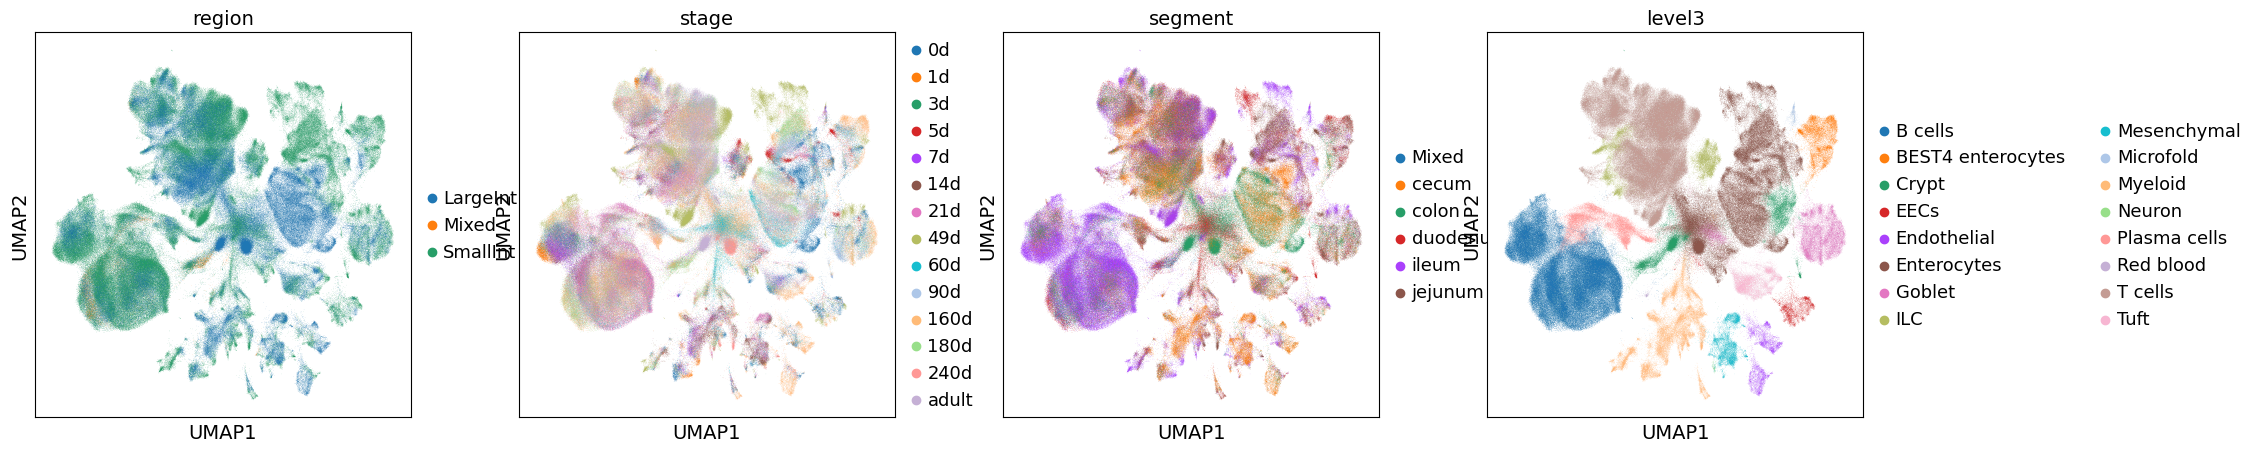

In [41]:
sc.pl.umap(adata,color=['region','stage','segment','level3'])

In [ ]:
#color
#epi_c:'#AE123AFF', '#D1283DFF', '#EA4C47FF', '#F67561FF', '#FB9B86FF', '#FFBEB2FF','#99D789FF','#B9C362FF','#CACACAFF','#09622AFF','#3B8C52FF'
#b_c: '#eedbbd','#e1a25f','#c26c43','#9f3632',
#T_c: '#b9ddf1','#94c1e0','#75a6cb','#5889b6','#42779e','#2a5783',
#mye_c:'#d5d5d5','#a1a7a9','#707c83','#49525e', '#879195'
#endo_c:'#FEFFD9FF', '#C4EAB1FF', '#41B7C4FF'
#mess_c:'#eec9e5','#dbaccc','#c692b4','#af799f','#91648f','#7c4d79','#aca4e2',
#neron_c:'#aca4e2','#5cbd92',
#red_c:'#b9173a'

In [7]:
colors=['#AE123AFF', '#D1283DFF', '#EA4C47FF', '#F67561FF', '#FB9B86FF', '#FFBEB2FF','#99D789FF','#B9C362FF','#CACACAFF','#09622AFF','#3B8C52FF',
 '#eedbbd','#e1a25f','#c26c43','#9f3632',
 '#b9ddf1','#94c1e0','#75a6cb','#5889b6','#42779e','#2a5783',
 '#d5d5d5','#a1a7a9','#707c83','#49525e', '#879195',
 '#FEFFD9FF', '#C4EAB1FF', '#41B7C4FF' ,
 '#eec9e5','#dbaccc','#c692b4','#af799f','#91648f','#7c4d79',
 '#aca4e2','#5cbd92',
 '#b9173a']

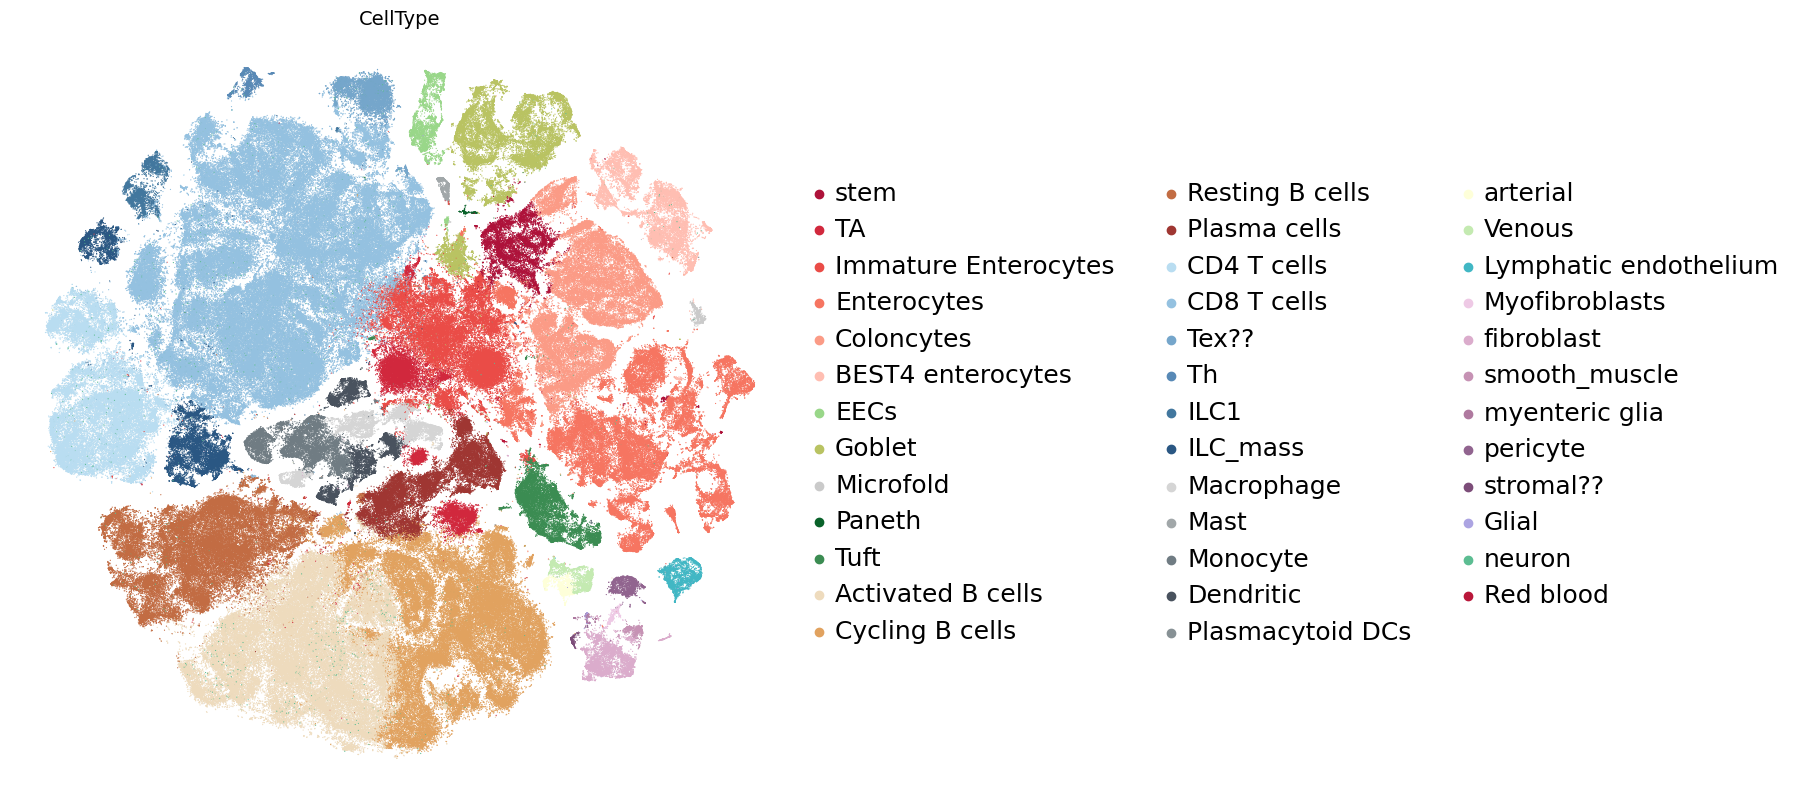

In [98]:
sc.pl.tsne(adata,color='CellType',palette=colors,legend_fontsize=18,  title='CellType',size=3,frameon=False,save='_celltype_v1.pdf')

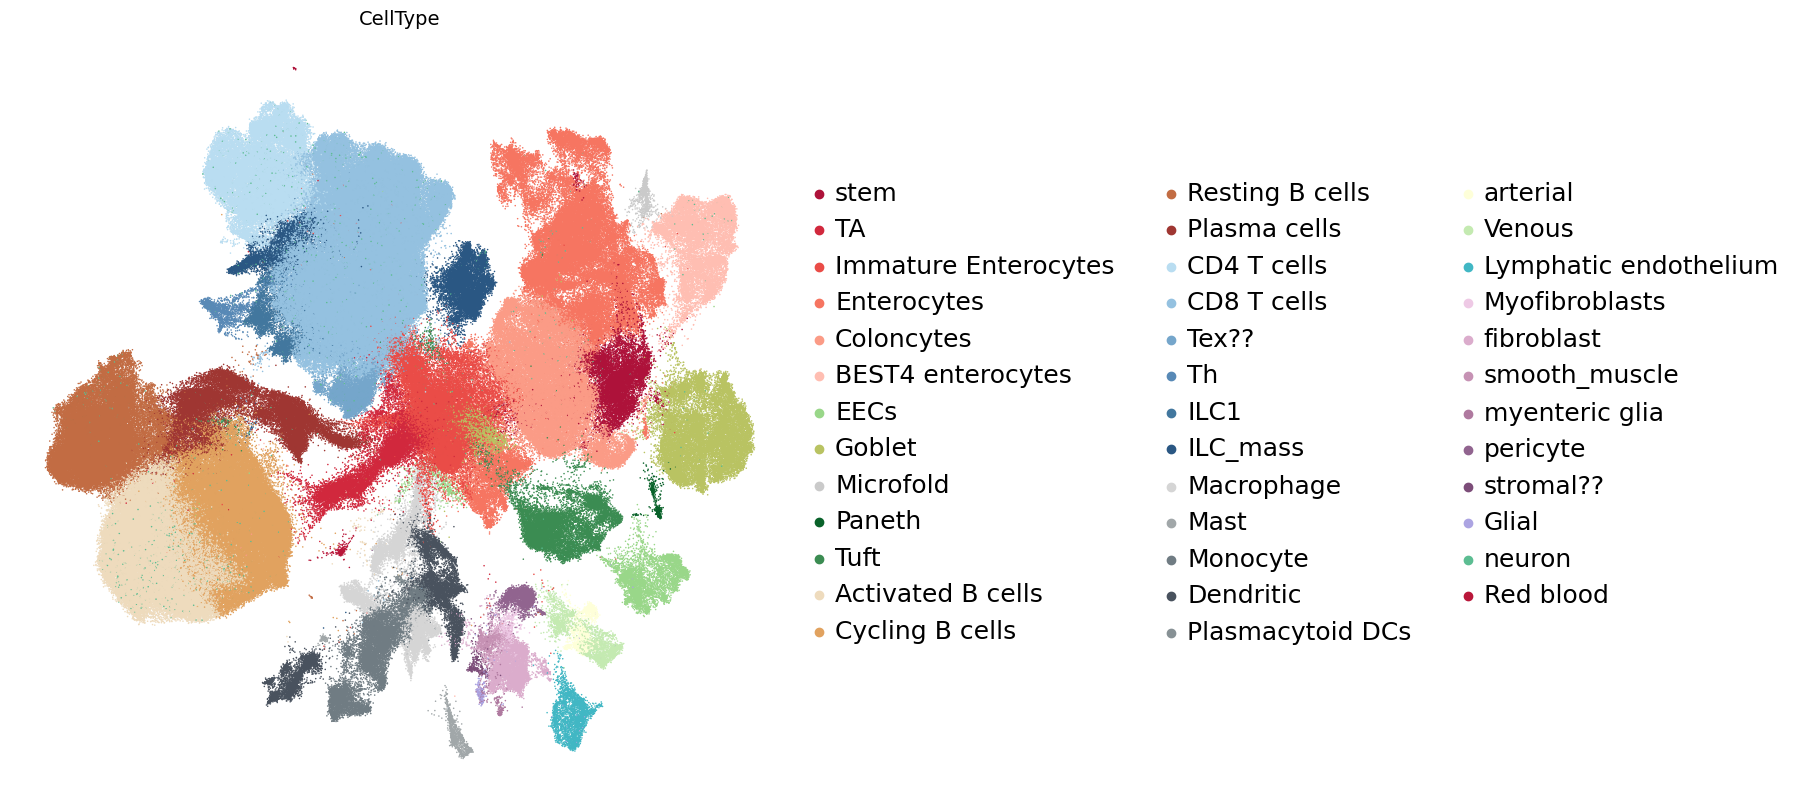

In [103]:
sc.pl.umap(adata,color='CellType',palette=colors,legend_fontsize=18, legend_fontweight='bold', title='CellType',size=5,frameon=False,save='_celltype_v1.pdf')

In [107]:
celltypes=adata.obs['CellType'].cat.categories.to_list()

In [109]:
cell_type_colors = dict(zip(celltypes, colors))

In [24]:
adata.write('/disk212/yupf/database/scRNA-seq/NewAtlas/atlas_level3_with_meta.h5ad')

进一步注释情况详见04_annotation_adjusted.ipynb

### level and percentage

In [3]:
adata=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/NewAtlas/atlas_level3_v2.h5ad')

In [3]:
level1=len(adata.obs['Lineage'].cat.categories.to_list())
level2=len(adata.obs['level3'].cat.categories.to_list())
level3=len(adata.obs['CellType'].cat.categories.to_list())

In [143]:
level=pd.DataFrame(columns=['level'])
level.loc['level1','level']=level1
level.loc['level2','level']=level2
level.loc['level3','level']=level3

In [144]:
level

level
level1     8
level2    16
level3    38

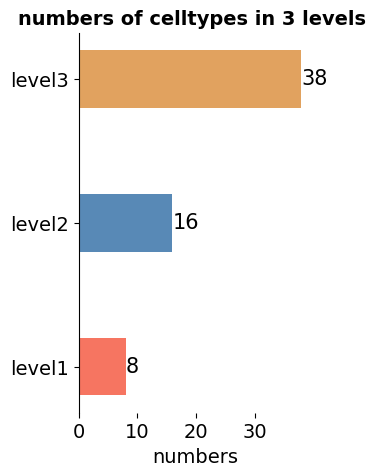

In [177]:
samples = level.index
correlation_values = level['level']
colors = ['#F67561FF', '#5889b6','#e1a25f']
subcolors=colors[-len(level):]
# 绘制横向条形图
plt.figure(figsize=(3, 5))
plt.barh(samples, correlation_values, color=subcolors, linewidth=0.5, height=0.4)

ax.invert_yaxis()

# 设置边框
ax = plt.gca()
# ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.xlabel('numbers')
plt.grid(False)
plt.title('numbers of celltypes in 3 levels ',fontsize=14, fontweight = 'bold')

# 添加数字标签
for bar, value in zip(bars, correlation_values):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(value),
             ha='left', va='center', fontsize=15)
# plt.show()
plt.savefig('/disk212/yupf/database/scRNA-seq/NewAtlas/figures/3level_numbers.pdf',dpi=300, bbox_inches='tight')

In [3]:
sc.tl.rank_genes_groups(adata, groupby='Lineage', method='wilcoxon', n_genes=20, key_added='rank_genes_groups_Lineage')

categories: Epithelial lineage, B lineage, T/ILC lineage, etc.
var_group_labels: Epithelial, Red blood, Myeloid, etc.


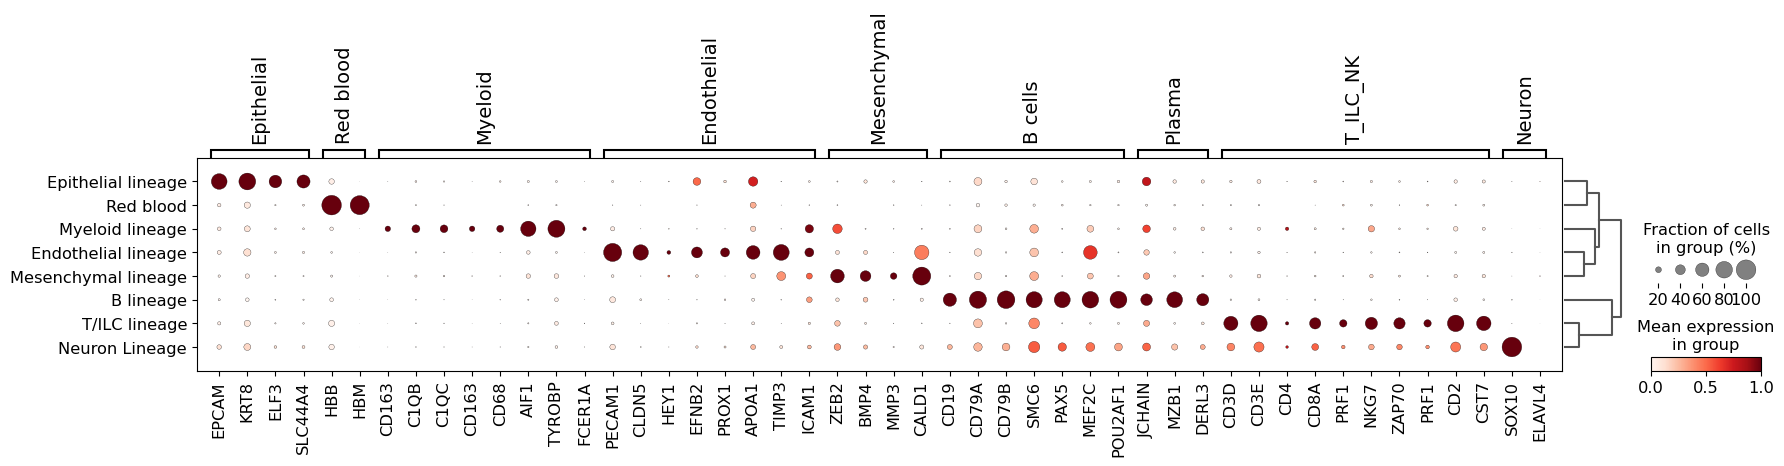

In [10]:
marker_genes_dict = {
    'Epithelial':['EPCAM','KRT8','ELF3','SLC44A4'],
    'Red blood':['HBB','HBM'],
    'Myeloid':['CD163','C1QB','C1QC','CD163','CD68','AIF1','TYROBP','FCER1A'],
    'Endothelial':['PECAM1','CLDN5','HEY1','EFNB2','PROX1','APOA1','TIMP3','ICAM1'],
    'Mesenchymal':['ZEB2','BMP4','MMP3','CALD1'],
    'B cells': ['CD19','CD79A','CD79B','SMC6','PAX5','MEF2C','POU2AF1'],
    'Plasma':['JCHAIN','MZB1','DERL3'],
    'T_ILC_NK': ['CD3D','CD3E','CD4','CD8A','PRF1','NKG7','ZAP70','PRF1','CD2','CST7'],
    'Neuron':['SOX10','ELAVL4']
}
sc.pl.rank_genes_groups_dotplot(adata, var_names=marker_genes_dict, key='rank_genes_groups_Lineage', standard_scale='var',save='_marker_Lineage.pdf')

### 日龄问题——细胞比例变化

In [46]:
adata=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/NewAtlas/atlas_level3_v2.h5ad')

In [4]:
colors=['#AE123AFF', '#D1283DFF', '#EA4C47FF', '#F67561FF', '#FB9B86FF', '#FFBEB2FF','#99D789FF','#B9C362FF','#CACACAFF','#09622AFF','#3B8C52FF',
 '#eedbbd','#e1a25f','#c26c43','#9f3632',
 '#b9ddf1','#94c1e0','#75a6cb','#5889b6','#42779e','#2a5783',
 '#d5d5d5','#a1a7a9','#707c83','#49525e', '#879195',
 '#FEFFD9FF', '#C4EAB1FF', '#41B7C4FF' ,
 '#eec9e5','#dbaccc','#c692b4','#af799f','#91648f','#7c4d79',
 '#aca4e2','#5cbd92',
 '#b9173a']

In [ ]:
# celltypes = adata.obs['CellType'].unique()
# age_days = adata.obs['age'].unique()
# df = pd.DataFrame(index=celltypes, columns=age_days)
# for cell_type in celltypes:
#     for age in age_days:
#         count = len(adata.obs[(adata.obs['CellType'] == cell_type) & (adata.obs['age'] == age)])
#         proportion = count / len(adata.obs[adata.obs['age'] == age])
#         df.at[cell_type, age] = proportion

In [8]:
celltypes = adata.obs['CellType'].unique()
age_days = adata.obs['stage'].unique()
df = pd.DataFrame(index=celltypes, columns=age_days)
for cell_type in celltypes:
    for age in age_days:
        count = len(adata.obs[(adata.obs['CellType'] == cell_type) & (adata.obs['stage'] == age)])
        proportion = count / len(adata.obs[adata.obs['stage'] == age])
        df.at[cell_type, age] = proportion

In [9]:
df

Adult   Newborn    Piglet   Weaning    Weaner  \
Activated B cells      0.093063  0.003031  0.104764  0.202522  0.066951   
TA                     0.055059  0.001273   0.00781  0.004859  0.007117   
Cycling B cells        0.062444   0.00162  0.108965  0.341647  0.046348   
CD8+ T cells            0.35206  0.047225  0.098708   0.12637  0.166186   
Plasma cells           0.025687  0.001018  0.031205   0.07654  0.019646   
Macrophage             0.013625  0.016775  0.015619  0.008258  0.024787   
Immature Enterocytes    0.05925  0.009972  0.003575  0.007689  0.120796   
CD4+ T cells           0.068976  0.023716  0.062622  0.036183  0.041807   
Resting B cells        0.028831  0.109628  0.208198  0.062519  0.037107   
Enterocytes            0.047657  0.284597  0.051114  0.045242  0.140564   
Goblet                 0.014045  0.063514  0.012144  0.001176  0.053035   
C4A+ stromal            0.00045  0.000347  0.001408  0.001202       0.0   
arterial               0.000852  0.010991  0.002849  0.000504   0.00108   
Venous                  0.00118   0.00516  0.000994  0.000388  0.000528   
EECs                   0.001612  0.046021  0.004871  0.001318  0.017179   
neuron                 0.004532  0.000093  0.000547  0.000362  0.004074   
Monocyte               0.003053   0.03908  0.072967  0.014693  0.002687   
BEST4 enterocytes      0.012457    0.0379  0.014368  0.001344  0.019904   
Lymphatic endothelium  0.001928  0.006479   0.00133  0.000956  0.000429   
MEF2C+ T cells          0.00312   0.00074   0.00133  0.000569  0.007841   
Glial                   0.00003   0.00081  0.000648  0.000569  0.000074   
NK cells               0.005432  0.006432  0.016859  0.003993   0.00346   
Dendritic              0.018296  0.015896  0.023384  0.006591  0.014676   
ILC                    0.009787  0.037761  0.063638  0.012729  0.018357   
pericyte               0.000079   0.00516  0.008536  0.013969  0.000098   
Mast                   0.001083  0.002985   0.00248  0.000892  0.001362   
Microfold              0.000274  0.005646  0.002994  0.002042  0.000908   
Tuft                   0.016867  0.054166   0.01363  0.001421  0.006614   
stem                   0.013613  0.047826  0.006737  0.004058  0.014971   
Red blood              0.000018  0.001319  0.001039  0.000517  0.000282   
fibroblast             0.001442  0.018534  0.033082  0.011424  0.001718   
Cytotoxic T cells      0.002019  0.007983  0.003162  0.003114  0.080792   
Myofibroblasts         0.000164  0.005067  0.000961  0.000233  0.000135   
smooth_muscle           0.00003  0.001319  0.005966  0.002029  0.000147   
myenteric glia         0.000043  0.001388  0.001073  0.000698  0.000319   
Coloncytes             0.080856  0.078206  0.009608  0.001266  0.077798   
Plasmacytoid DCs       0.000055  0.000324  0.000816  0.000116       0.0   
Paneth                  0.00003       0.0       0.0       0.0  0.000221   

                         Feeder  
Activated B cells      0.088373  
TA                     0.014411  
Cycling B cells        0.069206  
CD8+ T cells           0.252857  
Plasma cells           0.037424  
Macrophage             0.011586  
Immature Enterocytes   0.071498  
CD4+ T cells           0.053503  
Resting B cells          0.0281  
Enterocytes            0.045937  
Goblet                 0.071618  
C4A+ stromal           0.000008  
arterial               0.003471  
Venous                 0.012577  
EECs                   0.005921  
neuron                 0.006477  
Monocyte               0.004606  
BEST4 enterocytes      0.041181  
Lymphatic endothelium  0.014629  
MEF2C+ T cells         0.001833  
Glial                  0.000488  
NK cells               0.004839  
Dendritic              0.007942  
ILC                    0.010601  
pericyte               0.000548  
Mast                    0.00272  
Microfold              0.000105  
Tuft                    0.02946  
stem                   0.019347  
Red blood                   0.0  
fibroblast             0.001172  
Cytotoxic T 

In [10]:
adata.obs['stage']

AAACCCAAGAGTTGAT-1_CNP0002165            Adult
AAACCCAAGCAACTTC-1_CNP0002165            Adult
AAACCCAAGCAGTCTT-1_CNP0002165            Adult
AAACCCAAGCGCATCC-1_CNP0002165            Adult
AAACCCAAGGGTAGCT-1_CNP0002165            Adult
                                         ...  
TTTGTTGCAATCGCCG-1_PRJNA859792_NoPP4    Weaner
TTTGTTGGTACCTAGT-1_PRJNA859792_NoPP4    Weaner
TTTGTTGGTACTAAGA-1_PRJNA859792_NoPP4    Weaner
TTTGTTGGTTTCGCTC-1_PRJNA859792_NoPP4    Weaner
TTTGTTGTCAGTGTCA-1_PRJNA859792_NoPP4    Weaner
Name: stage, Length: 589101, dtype: category
Categories (6, object): ['Adult', 'Feeder', 'Newborn', 'Piglet', 'Weaner', 'Weaning']

In [11]:
# order=['0d', '1d', '3d', '5d', '7d', '14d', '21d', '49d', '60d','90d','160d','180d', '240d','adult']
order=['Newborn', 'Piglet', 'Weaning',  'Weaner','Feeder','Adult' ]
cell=['stem',
'TA',
'Immature Enterocytes',
'Enterocytes',
'Coloncytes',
'BEST4 enterocytes',
'EECs',
'Goblet',
'Microfold',
'Paneth',
'Tuft',
'Activated B cells',
'Cycling B cells',
'Resting B cells',
'Plasma cells',
'CD4+ T cells',
'CD8+ T cells',
'MEF2C+ T cells',
'Cytotoxic T cells',
'ILC',
'NK cells',
'Macrophage',
'Mast',
'Monocyte',
'Dendritic',
'Plasmacytoid DCs',
'arterial',
'Venous',
'Lymphatic endothelium',
'Myofibroblasts',
'fibroblast',
'smooth_muscle',
'myenteric glia',
'pericyte',
'C4A+ stromal',
'Glial',
'neuron',
'Red blood']
df=df[order]
df=df.reindex(cell)
df

Newborn    Piglet   Weaning    Weaner    Feeder  \
stem                   0.047826  0.006737  0.004058  0.014971  0.019347   
TA                     0.001273   0.00781  0.004859  0.007117  0.014411   
Immature Enterocytes   0.009972  0.003575  0.007689  0.120796  0.071498   
Enterocytes            0.284597  0.051114  0.045242  0.140564  0.045937   
Coloncytes             0.078206  0.009608  0.001266  0.077798  0.074398   
BEST4 enterocytes        0.0379  0.014368  0.001344  0.019904  0.041181   
EECs                   0.046021  0.004871  0.001318  0.017179  0.005921   
Goblet                 0.063514  0.012144  0.001176  0.053035  0.071618   
Microfold              0.005646  0.002994  0.002042  0.000908  0.000105   
Paneth                      0.0       0.0       0.0  0.000221  0.003111   
Tuft                   0.054166   0.01363  0.001421  0.006614   0.02946   
Activated B cells      0.003031  0.104764  0.202522  0.066951  0.088373   
Cycling B cells         0.00162  0.108965  0.341647  0.046348  0.069206   
Resting B cells        0.109628  0.208198  0.062519  0.037107    0.0281   
Plasma cells           0.001018  0.031205   0.07654  0.019646  0.037424   
CD4+ T cells           0.023716  0.062622  0.036183  0.041807  0.053503   
CD8+ T cells           0.047225  0.098708   0.12637  0.166186  0.252857   
MEF2C+ T cells          0.00074   0.00133  0.000569  0.007841  0.001833   
Cytotoxic T cells      0.007983  0.003162  0.003114  0.080792  0.009009   
ILC                    0.037761  0.063638  0.012729  0.018357  0.010601   
NK cells               0.006432  0.016859  0.003993   0.00346  0.004839   
Macrophage             0.016775  0.015619  0.008258  0.024787  0.011586   
Mast                   0.002985   0.00248  0.000892  0.001362   0.00272   
Monocyte                0.03908  0.072967  0.014693  0.002687  0.004606   
Dendritic              0.015896  0.023384  0.006591  0.014676  0.007942   
Plasmacytoid DCs       0.000324  0.000816  0.000116       0.0       0.0   
arterial               0.010991  0.002849  0.000504   0.00108  0.003471   
Venous                  0.00516  0.000994  0.000388  0.000528  0.012577   
Lymphatic endothelium  0.006479   0.00133  0.000956  0.000429  0.014629   
Myofibroblasts         0.005067  0.000961  0.000233  0.000135  0.000624   
fibroblast             0.018534  0.033082  0.011424  0.001718  0.001172   
smooth_muscle          0.001319  0.005966  0.002029  0.000147  0.000023   
myenteric glia         0.001388  0.001073  0.000698  0.000319  0.000398   
pericyte                0.00516  0.008536  0.013969  0.000098  0.000548   
C4A+ stromal           0.000347  0.001408  0.001202       0.0  0.000008   
Glial                   0.00081  0.000648  0.000569  0.000074  0.000488   
neuron                 0.000093  0.000547  0.000362  0.004074  0.006477   
Red blood              0.001319  0.001039  0.000517  0.000282       0.0   

                          Adult  
stem                   0.013613  
TA                     0.055059  
Immature Enterocytes    0.05925  
Enterocytes            0.047657  
Coloncytes             0.080856  
BEST4 enterocytes      0.012457  
EECs                   0.001612  
Goblet                 0.014045  
Microfold              0.000274  
Paneth                  0.00003  
Tuft                   0.016867  
Activated B cells      0.093063  
Cycling B cells        0.062444  
Resting B cells        0.028831  
Plasma cells           0.025687  
CD4+ T cells           0.068976  
CD8+ T cells            0.35206  
MEF2C+ T cells          0.00312  
Cytotoxic T cells      0.002019  
ILC                    0.009787  
NK cells               0.005432  
Macrophage             0.013625  
Mast                   0.001083  
Monocyte               0.003053  
Dendritic              0.018296  
Plasmacytoid DCs       0.000055  
arterial               0.000852  
Venous                  0.00118  
Lymphatic endothelium  0.001928  
Myofibroblasts         0.000164  
fibroblast             0.001442  
smooth_mus

In [12]:
# df.to_csv('/disk212/yupf/database/scRNA-seq/NewAtlas/metadata/age_proportion.csv')
df.to_csv('/disk212/yupf/database/scRNA-seq/NewAtlas/metadata/stage_proportion.csv')

In [30]:
color

'#b9173a'

In [32]:
allcolors

{'Activated B cells': '#AE123AFF',
 'TA': '#D1283DFF',
 'Cycling B cells': '#EA4C47FF',
 'CD8+ T cells': '#F67561FF',
 'Plasma cells': '#FB9B86FF',
 'Macrophage': '#FFBEB2FF',
 'Immature Enterocytes': '#99D789FF',
 'CD4+ T cells': '#B9C362FF',
 'Resting B cells': '#CACACAFF',
 'Enterocytes': '#09622AFF',
 'Goblet': '#3B8C52FF',
 'C4A+ stromal': '#eedbbd',
 'arterial': '#e1a25f',
 'Venous': '#c26c43',
 'EECs': '#9f3632',
 'neuron': '#b9ddf1',
 'Monocyte': '#94c1e0',
 'BEST4 enterocytes': '#75a6cb',
 'Lymphatic endothelium': '#5889b6',
 'MEF2C+ T cells': '#42779e',
 'Glial': '#2a5783',
 'NK cells': '#d5d5d5',
 'Dendritic': '#a1a7a9',
 'ILC': '#707c83',
 'pericyte': '#49525e',
 'Mast': '#879195',
 'Microfold': '#FEFFD9FF',
 'Tuft': '#C4EAB1FF',
 'stem': '#41B7C4FF',
 'Red blood': '#eec9e5',
 'fibroblast': '#dbaccc',
 'Cytotoxic T cells': '#c692b4',
 'Myofibroblasts': '#af799f',
 'smooth_muscle': '#91648f',
 'myenteric glia': '#7c4d79',
 'Coloncytes': '#aca4e2',
 'Plasmacytoid DCs': '#5cbd

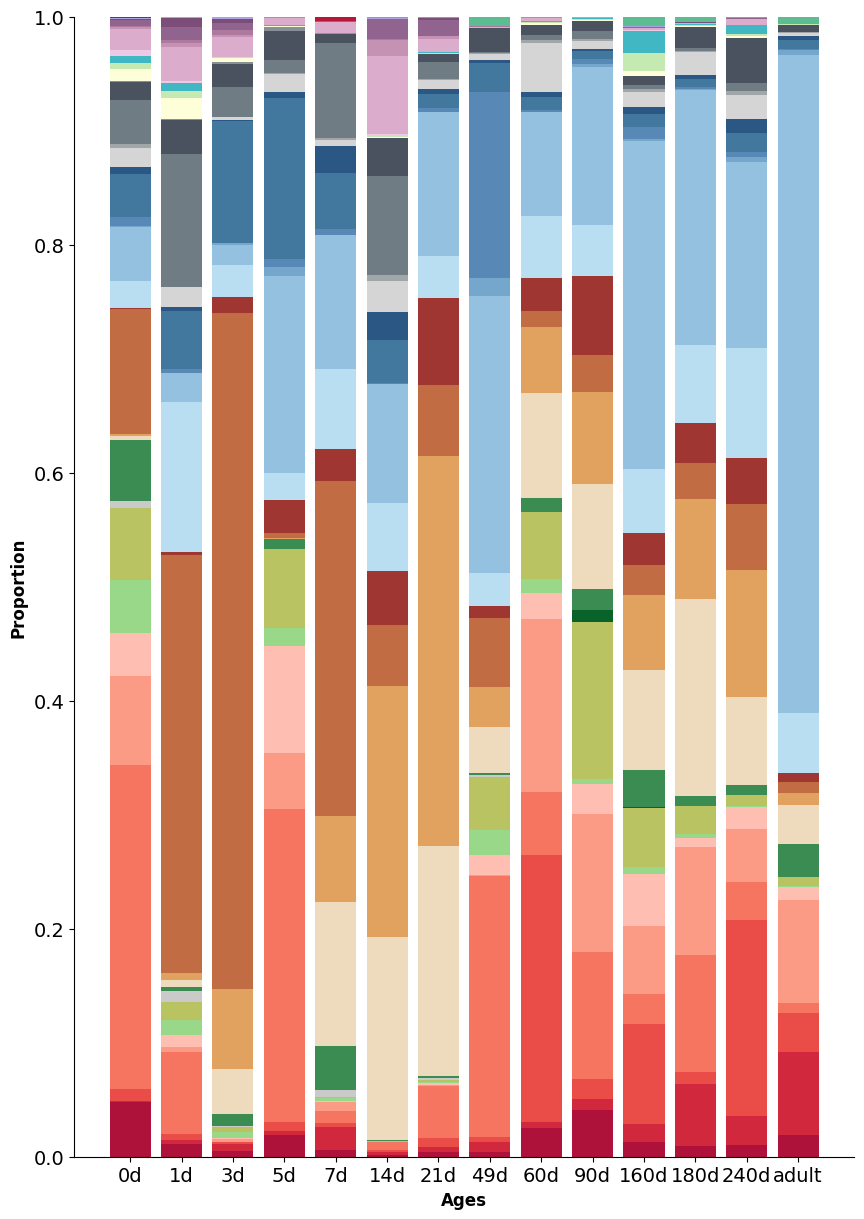

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义行和列的标签
cell_types = cell
age_days = order
allcolors = dict(zip(cell, colors))
# 绘制堆叠条形图
fig, ax = plt.subplots(figsize=(10, 15))
bottom = np.zeros(len(age_days))  # 记录每个细胞类型的堆叠起始位置

for i, cell_type in enumerate(cell):
    color = allcolors.get(cell_type, 'gray')
    plt.bar(df.columns, df.loc[cell_type], bottom=bottom, label=cell_type,color=color)
    bottom += df.loc[cell_type]

plt.xlabel('Ages',fontsize=12, # High font size for style
         fontweight = 'bold',family='dejavu sans')
plt.ylabel('Proportion',fontsize=12, # High font size for style
         fontweight = 'bold',family='dejavu sans')

# # 将图例移到右侧，删除图例背景
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Remove the spines (border lines) from the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis() 
# 去除网格线
plt.grid(False)
plt.ylim(0, 1)  # 设置纵坐标范围为0-1
plt.savefig('/disk212/yupf/database/scRNA-seq/NewAtlas/figures/celltype_proportion.pdf',dpi=300, bbox_inches='tight')
# plt.show()

按品种

In [35]:
celltypes = adata.obs['CellType'].unique()
breed_days = adata.obs['breed'].unique()
df = pd.DataFrame(index=celltypes, columns=breed_days)
for cell_type in celltypes:
    for breed in breed_days:
        count = len(adata.obs[(adata.obs['CellType'] == cell_type) & (adata.obs['breed'] == breed)])
        proportion = count / len(adata.obs[adata.obs['breed'] == breed])
        df.at[cell_type, breed] = proportion

In [36]:
df

DLY large white    Jinhua        LY Sus scrofa  \
Activated B cells      0.473922    0.144337  0.074788  0.148629   0.028802   
TA                     0.110609    0.006966  0.018377   0.00383   0.062217   
Cycling B cells        0.206475    0.106895   0.06337  0.485182   0.009148   
CD8+ T cells           0.036598    0.132745  0.151784  0.024786   0.515049   
Plasma cells           0.083346    0.024226  0.032137  0.113631   0.011422   
Macrophage             0.010594    0.012921  0.022938  0.009063   0.004853   
Immature Enterocytes   0.003852    0.007929  0.100085  0.001191   0.029628   
CD4+ T cells           0.024374    0.058411  0.062241  0.028956   0.048368   
Resting B cells        0.024818    0.164917  0.048846  0.086484   0.008589   
Enterocytes            0.001556    0.075926  0.096518  0.060039   0.049677   
Goblet                 0.000074    0.009776  0.056192  0.001681   0.017228   
C4A+ stromal           0.004223    0.001035  0.000163  0.001957        0.0   
arterial                0.00363    0.003933  0.002494  0.000255   0.000241   
Venous                 0.002297    0.001441   0.00205  0.000021   0.000534   
EECs                   0.004593    0.010063  0.009907  0.001915   0.003138   
neuron                 0.002297    0.000486   0.00187   0.00017   0.005654   
Monocyte               0.001259    0.059669  0.012334  0.006106   0.002287   
BEST4 enterocytes       0.00037      0.0032  0.024617  0.001872   0.024267   
Lymphatic endothelium  0.000593    0.002054  0.003083  0.000298   0.000114   
MEF2C+ T cells          0.00037    0.000406  0.001741  0.000894   0.005006   
Glial                  0.000148    0.000852  0.000213  0.000064   0.000013   
NK cells               0.000889    0.014458  0.005897   0.00117   0.003583   
Dendritic              0.000741    0.019083  0.017512  0.004234   0.008627   
ILC                    0.000445    0.043341   0.01444  0.006085   0.028243   
pericyte               0.000296    0.015508   0.00073  0.000191   0.000025   
Mast                   0.000148    0.002468  0.002179  0.000106   0.000623   
Microfold              0.000074    0.003766  0.000477  0.003361        0.0   
Tuft                    0.00037    0.014561  0.020281  0.000319   0.026083   
stem                   0.000296    0.007945  0.026223  0.001511   0.019362   
Red blood              0.000148    0.001043  0.000337  0.000085   0.000013   
fibroblast             0.000296     0.03292  0.004016  0.000511   0.000877   
Cytotoxic T cells      0.000296    0.003368  0.003471  0.004361    0.00188   
Myofibroblasts              0.0    0.001815  0.000657  0.000021   0.000102   
smooth_muscle               0.0    0.005541  0.000348       0.0   0.000051   
myenteric glia              0.0    0.001361  0.000253       0.0   0.000025   
Coloncytes                  0.0    0.004371  0.115367   0.00083   0.083713   
Plasmacytoid DCs            0.0    0.000263  0.000073  0.000191   0.000559   
Paneth                      0.0         0.0  0.001988       0.0        0.0   

                           Bama     Duroc     Mixed  
Activated B cells      0.021487  0.087261  0.040879  
TA                     0.002412  0.015738   0.00881  
Cycling B cells         0.09055  0.065697  0.035065  
CD8+ T cells           0.172988  0.288269  0.243505  
Plasma cells           0.049112  0.027588  0.010182  
Macrophage             0.073449  0.013179   0.00579  
Immature Enterocytes   0.016663  0.088117  0.004043  
CD4+ T cells           0.111379  0.056248  0.028925  
Resting B cells        0.016882  0.026741   0.06072  
Enterocytes            0.113352  0.025757   0.22888  
Goblet                 0.069722  0.051357  0.046944  
C4A+ stromal                0.0   0.00001       0.0  
arterial               0.001754  0.004262       0.0  
Venous                 0.000439  0.016053       0.0  
EECs                   0.008551   0.00625  0.021937  
neuron                      0.0  0.008307  0.007437  
Monocyte               0.018636  0.003858  0.000973  
BEST4 enteroc

In [ ]:
'DLY','LY','Duroc','large white','Jinhua','Sus scrofa','Bama','Mixed'

In [37]:
order=['DLY','LY','Sus scrofa','Duroc','large white','Jinhua','Bama','Mixed']
cell=['stem',
'TA',
'Immature Enterocytes',
'Enterocytes',
'Coloncytes',
'BEST4 enterocytes',
'EECs',
'Goblet',
'Microfold',
'Paneth',
'Tuft',
'Activated B cells',
'Cycling B cells',
'Resting B cells',
'Plasma cells',
'CD4+ T cells',
'CD8+ T cells',
'MEF2C+ T cells',
'Cytotoxic T cells',
'ILC',
'NK cells',
'Macrophage',
'Mast',
'Monocyte',
'Dendritic',
'Plasmacytoid DCs',
'arterial',
'Venous',
'Lymphatic endothelium',
'Myofibroblasts',
'fibroblast',
'smooth_muscle',
'myenteric glia',
'pericyte',
'C4A+ stromal',
'Glial',
'neuron',
'Red blood']
df=df[order]
df=df.reindex(cell)
df

DLY        LY Sus scrofa     Duroc large white  \
stem                   0.000296  0.001511   0.019362  0.012765    0.007945   
TA                     0.110609   0.00383   0.062217  0.015738    0.006966   
Immature Enterocytes   0.003852  0.001191   0.029628  0.088117    0.007929   
Enterocytes            0.001556  0.060039   0.049677  0.025757    0.075926   
Coloncytes                  0.0   0.00083   0.083713   0.05989    0.004371   
BEST4 enterocytes       0.00037  0.001872   0.024267  0.045894      0.0032   
EECs                   0.004593  0.001915   0.003138   0.00625    0.010063   
Goblet                 0.000074  0.001681   0.017228  0.051357    0.009776   
Microfold              0.000074  0.003361        0.0  0.000108    0.003766   
Paneth                      0.0       0.0        0.0  0.000738         0.0   
Tuft                    0.00037  0.000319   0.026083  0.032794    0.014561   
Activated B cells      0.473922  0.148629   0.028802  0.087261    0.144337   
Cycling B cells        0.206475  0.485182   0.009148  0.065697    0.106895   
Resting B cells        0.024818  0.086484   0.008589  0.026741    0.164917   
Plasma cells           0.083346  0.113631   0.011422  0.027588    0.024226   
CD4+ T cells           0.024374  0.028956   0.048368  0.056248    0.058411   
CD8+ T cells           0.036598  0.024786   0.515049  0.288269    0.132745   
MEF2C+ T cells          0.00037  0.000894   0.005006  0.001486    0.000406   
Cytotoxic T cells      0.000296  0.004361    0.00188  0.010324    0.003368   
ILC                    0.000445  0.006085   0.028243  0.011811    0.043341   
NK cells               0.000889   0.00117   0.003583  0.005777    0.014458   
Macrophage             0.010594  0.009063   0.004853  0.013179    0.012921   
Mast                   0.000148  0.000106   0.000623  0.002884    0.002468   
Monocyte               0.001259  0.006106   0.002287  0.003858    0.059669   
Dendritic              0.000741  0.004234   0.008627  0.007756    0.019083   
Plasmacytoid DCs            0.0  0.000191   0.000559       0.0    0.000263   
arterial                0.00363  0.000255   0.000241  0.004262    0.003933   
Venous                 0.002297  0.000021   0.000534  0.016053    0.001441   
Lymphatic endothelium  0.000593  0.000298   0.000114  0.018976    0.002054   
Myofibroblasts              0.0  0.000021   0.000102  0.000807    0.001815   
fibroblast             0.000296  0.000511   0.000877  0.001496     0.03292   
smooth_muscle               0.0       0.0   0.000051   0.00003    0.005541   
myenteric glia              0.0       0.0   0.000025  0.000512    0.001361   
pericyte               0.000296  0.000191   0.000025  0.000679    0.015508   
C4A+ stromal           0.004223  0.001957        0.0   0.00001    0.001035   
Glial                  0.000148  0.000064   0.000013  0.000581    0.000852   
neuron                 0.002297   0.00017   0.005654  0.008307    0.000486   
Red blood              0.000148  0.000085   0.000013       0.0    0.001043   

                         Jinhua      Bama     Mixed  
stem                   0.026223  0.062706  0.004193  
TA                     0.018377  0.002412   0.00881  
Immature Enterocytes   0.100085  0.016663  0.004043  
Enterocytes            0.096518  0.113352   0.22888  
Coloncytes             0.115367  0.005043  0.001173  
BEST4 enterocytes      0.024617   0.00877   0.01717  
EECs                   0.009907  0.008551  0.021937  
Goblet                 0.056192  0.069722  0.046944  
Microfold              0.000477  0.000219  0.001847  
Paneth                 0.001988       0.0    0.0002  
Tuft                   0.020281  0.004385  0.000973  
Activated B cells      0.074788  0.021487  0.040879  
Cycling B cells         0.06337   0.09055  0.035065  
Resting B cells        0.048846  0.016882   0.06072  
Plasma cells           0.032137  0.049112  0.010182  
CD4+ T cells           0.062241  0.111379  0.028925  
CD8+ T cells           0.151784  0.172988  0.243505  
MEF2C+ T cell

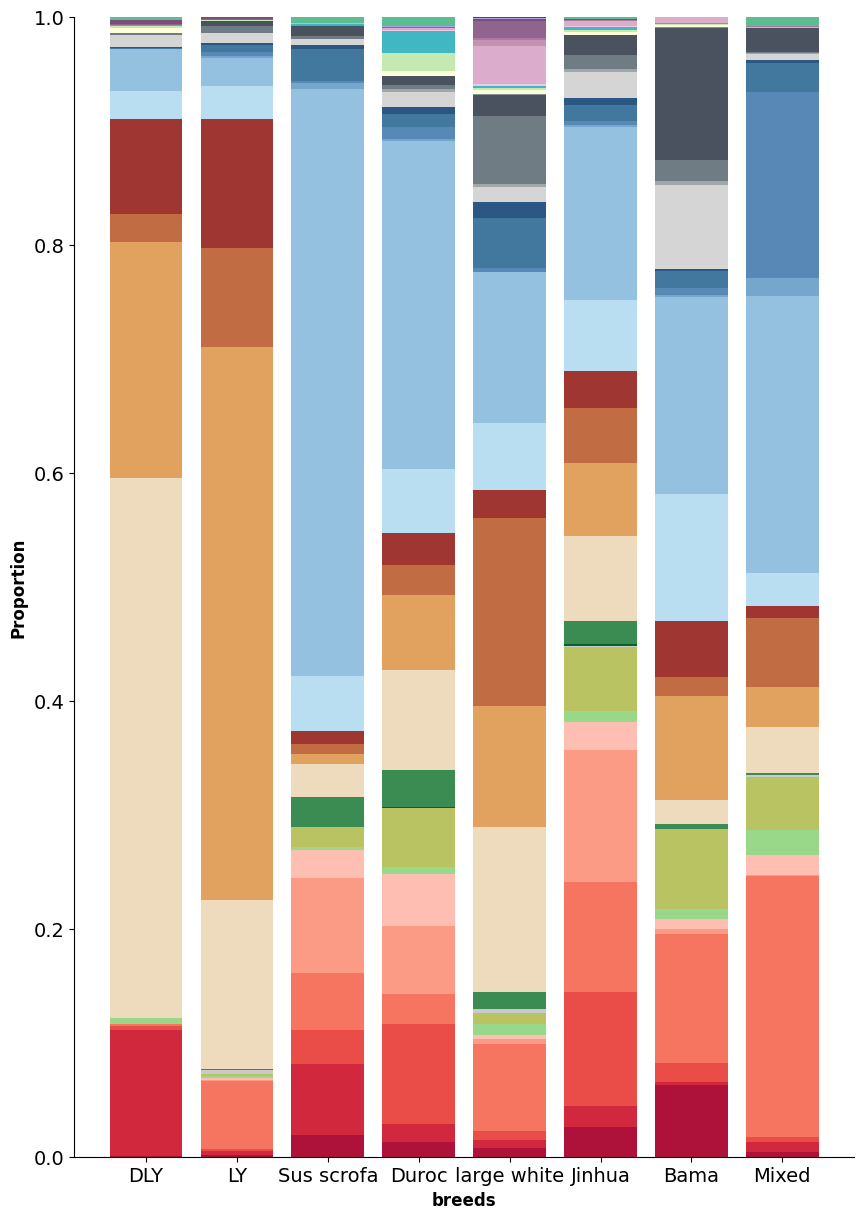

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义行和列的标签
cell_types = cell
breed_days = order
allcolors = dict(zip(cell, colors))
# 绘制堆叠条形图
fig, ax = plt.subplots(figsize=(10, 15))
bottom = np.zeros(len(breed_days))  # 记录每个细胞类型的堆叠起始位置

for i, cell_type in enumerate(cell):
    color = allcolors.get(cell_type, 'gray')
    plt.bar(df.columns, df.loc[cell_type], bottom=bottom, label=cell_type,color=color)
    bottom += df.loc[cell_type]

plt.xlabel('breeds',fontsize=12, # High font size for style
         fontweight = 'bold',family='dejavu sans')
plt.ylabel('Proportion',fontsize=12, # High font size for style
         fontweight = 'bold',family='dejavu sans')

# # 将图例移到右侧，删除图例背景
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Remove the spines (border lines) from the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis() 
# 去除网格线
plt.grid(False)
plt.ylim(0, 1)  # 设置纵坐标范围为0-1
plt.savefig('/disk212/yupf/database/scRNA-seq/NewAtlas/figures/celltype_proportion_breed.pdf',dpi=300, bbox_inches='tight')
plt.show()

按肠段

In [39]:
celltypes = adata.obs['CellType'].unique()
segment_days = adata.obs['segment'].unique()
df = pd.DataFrame(index=celltypes, columns=segment_days)
for cell_type in celltypes:
    for segment in segment_days:
        count = len(adata.obs[(adata.obs['CellType'] == cell_type) & (adata.obs['segment'] == segment)])
        proportion = count / len(adata.obs[adata.obs['segment'] == segment])
        df.at[cell_type, segment] = proportion

In [40]:
df

Mixed     ileum   jejunum  duodenum     cecum  \
Activated B cells      0.473922  0.186379  0.000602  0.044292  0.022781   
TA                     0.110609  0.010277  0.006472  0.024719  0.007082   
Cycling B cells        0.206475  0.221251  0.000718  0.023409  0.030408   
CD8+ T cells           0.036598  0.139731   0.32279  0.289094  0.263043   
Plasma cells           0.083346   0.04597  0.033517  0.033373  0.015536   
Macrophage             0.010594  0.008536  0.019161  0.032404  0.017896   
Immature Enterocytes   0.003852  0.005902  0.015421  0.128856  0.022554   
CD4+ T cells           0.024374  0.046332  0.047768   0.07231  0.066265   
Resting B cells        0.024818  0.143665  0.004017  0.016326  0.029746   
Enterocytes            0.001556  0.054065  0.204307  0.106559   0.06986   
Goblet                 0.000074  0.014851   0.08257  0.049817  0.019168   
C4A+ stromal           0.004223  0.001073       0.0       0.0  0.000182   
arterial                0.00363  0.002252  0.001864  0.001702  0.004667   
Venous                 0.002297  0.000729  0.001412  0.002069  0.013329   
EECs                   0.004593  0.009227   0.01152  0.016339  0.003587   
neuron                 0.002297  0.003971    0.0033  0.004255  0.001743   
Monocyte               0.001259  0.010704  0.011103  0.004936  0.060844   
BEST4 enterocytes       0.00037   0.00587  0.067195  0.040691  0.005784   
Lymphatic endothelium  0.000593  0.000952  0.004179  0.001479  0.015735   
MEF2C+ T cells          0.00037  0.002717  0.007051   0.00491  0.000127   
Glial                  0.000148  0.000186  0.000127  0.000105  0.001189   
NK cells               0.000889  0.001658  0.007595  0.003758  0.019776   
Dendritic              0.000741  0.013059  0.028457  0.014153   0.01648   
ILC                    0.000445  0.017874  0.039363  0.019756  0.032143   
pericyte               0.000296  0.001481  0.000498  0.000694   0.01559   
Mast                   0.000148  0.000218  0.003797  0.003666  0.003396   
Microfold              0.000074  0.003413  0.000139  0.000026  0.000118   
Tuft                    0.00037  0.008447  0.025192    0.0221      0.03   
stem                   0.000296  0.005689  0.015363  0.019416   0.02556   
Red blood              0.000148  0.000316  0.000058  0.000432   0.00089   
fibroblast             0.000296   0.00417   0.00668  0.002632  0.030999   
Cytotoxic T cells      0.000296  0.026308   0.01857  0.006926  0.006637   
Myofibroblasts              0.0   0.00072  0.000845   0.00055  0.001071   
smooth_muscle               0.0  0.000423  0.000336  0.000196  0.005729   
myenteric glia              0.0  0.000358  0.000139  0.000353  0.001199   
Coloncytes                  0.0  0.001008  0.007282  0.002029  0.138795   
Plasmacytoid DCs            0.0  0.000218  0.000544       0.0  0.000091   
Paneth                      0.0       0.0  0.000046  0.005669       0.0   

                          colon  
Activated B cells      0.059774  
TA                     0.065771  
Cycling B cells        0.044473  
CD8+ T cells           0.185594  
Plasma cells           0.015862  
Macrophage             0.005516  
Immature Enterocytes   0.176999  
CD4+ T cells           0.046293  
Resting B cells        0.040902  
Enterocytes             0.00729  
Goblet                 0.043935  
C4A+ stromal           0.000011  
arterial               0.001373  
Venous                 0.003628  
EECs                   0.003353  
neuron                   0.0038  
Monocyte                 0.0038  
BEST4 enterocytes      0.015576  
Lymphatic endothelium  0.004028  
MEF2C+ T cells         0.000034  
Glial                   0.00024  
NK cells               0.004864  
Dendritic              0.004292  
ILC                    0.006008  
pericyte               0.000298  
Mast                   0.000458  
Microfold              0.000458  
Tuft                   0.021882  
stem                   0.024754  
Red blood              0.000114  
fibroblast             0.000973  
Cytotoxic T 

In [41]:
order=['duodenum','ileum','jejunum','cecum','colon']
cell=['stem',
'TA',
'Immature Enterocytes',
'Enterocytes',
'Coloncytes',
'BEST4 enterocytes',
'EECs',
'Goblet',
'Microfold',
'Paneth',
'Tuft',
'Activated B cells',
'Cycling B cells',
'Resting B cells',
'Plasma cells',
'CD4+ T cells',
'CD8+ T cells',
'MEF2C+ T cells',
'Cytotoxic T cells',
'ILC',
'NK cells',
'Macrophage',
'Mast',
'Monocyte',
'Dendritic',
'Plasmacytoid DCs',
'arterial',
'Venous',
'Lymphatic endothelium',
'Myofibroblasts',
'fibroblast',
'smooth_muscle',
'myenteric glia',
'pericyte',
'C4A+ stromal',
'Glial',
'neuron',
'Red blood']
df=df[order]
df=df.reindex(cell)
df

duodenum     ileum   jejunum     cecum     colon
stem                   0.019416  0.005689  0.015363   0.02556  0.024754
TA                     0.024719  0.010277  0.006472  0.007082  0.065771
Immature Enterocytes   0.128856  0.005902  0.015421  0.022554  0.176999
Enterocytes            0.106559  0.054065  0.204307   0.06986   0.00729
Coloncytes             0.002029  0.001008  0.007282  0.138795  0.201261
BEST4 enterocytes      0.040691   0.00587  0.067195  0.005784  0.015576
EECs                   0.016339  0.009227   0.01152  0.003587  0.003353
Goblet                 0.049817  0.014851   0.08257  0.019168  0.043935
Microfold              0.000026  0.003413  0.000139  0.000118  0.000458
Paneth                 0.005669       0.0  0.000046       0.0       0.0
Tuft                     0.0221  0.008447  0.025192      0.03  0.021882
Activated B cells      0.044292  0.186379  0.000602  0.022781  0.059774
Cycling B cells        0.023409  0.221251  0.000718  0.030408  0.044473
Resting B cells        0.016326  0.143665  0.004017  0.029746  0.040902
Plasma cells           0.033373   0.04597  0.033517  0.015536  0.015862
CD4+ T cells            0.07231  0.046332  0.047768  0.066265  0.046293
CD8+ T cells           0.289094  0.139731   0.32279  0.263043  0.185594
MEF2C+ T cells          0.00491  0.002717  0.007051  0.000127  0.000034
Cytotoxic T cells      0.006926  0.026308   0.01857  0.006637  0.005161
ILC                    0.019756  0.017874  0.039363  0.032143  0.006008
NK cells               0.003758  0.001658  0.007595  0.019776  0.004864
Macrophage             0.032404  0.008536  0.019161  0.017896  0.005516
Mast                   0.003666  0.000218  0.003797  0.003396  0.000458
Monocyte               0.004936  0.010704  0.011103  0.060844    0.0038
Dendritic              0.014153  0.013059  0.028457   0.01648  0.004292
Plasmacytoid DCs            0.0  0.000218  0.000544  0.000091  0.000011
arterial               0.001702  0.002252  0.001864  0.004667  0.001373
Venous                 0.002069  0.000729  0.001412  0.013329  0.003628
Lymphatic endothelium  0.001479  0.000952  0.004179  0.015735  0.004028
Myofibroblasts          0.00055   0.00072  0.000845  0.001071  0.000641
fibroblast             0.002632   0.00417   0.00668  0.030999  0.000973
smooth_muscle          0.000196  0.000423  0.000336  0.005729  0.000023
myenteric glia         0.000353  0.000358  0.000139  0.001199  0.000549
pericyte               0.000694  0.001481  0.000498   0.01559  0.000298
C4A+ stromal                0.0  0.001073       0.0  0.000182  0.000011
Glial                  0.000105  0.000186  0.000127  0.001189   0.00024
neuron                 0.004255  0.003971    0.0033  0.001743    0.0038
Red blood              0.000432  0.000316  0.000058   0.00089  0.000114

In [43]:
allcolors

{'stem': '#AE123AFF',
 'TA': '#D1283DFF',
 'Immature Enterocytes': '#EA4C47FF',
 'Enterocytes': '#F67561FF',
 'Coloncytes': '#FB9B86FF',
 'BEST4 enterocytes': '#FFBEB2FF',
 'EECs': '#99D789FF',
 'Goblet': '#B9C362FF',
 'Microfold': '#CACACAFF',
 'Paneth': '#09622AFF',
 'Tuft': '#3B8C52FF',
 'Activated B cells': '#eedbbd',
 'Cycling B cells': '#e1a25f',
 'Resting B cells': '#c26c43',
 'Plasma cells': '#9f3632',
 'CD4+ T cells': '#b9ddf1',
 'CD8+ T cells': '#94c1e0',
 'MEF2C+ T cells': '#75a6cb',
 'Cytotoxic T cells': '#5889b6',
 'ILC': '#42779e',
 'NK cells': '#2a5783',
 'Macrophage': '#d5d5d5',
 'Mast': '#a1a7a9',
 'Monocyte': '#707c83',
 'Dendritic': '#49525e',
 'Plasmacytoid DCs': '#879195',
 'arterial': '#FEFFD9FF',
 'Venous': '#C4EAB1FF',
 'Lymphatic endothelium': '#41B7C4FF',
 'Myofibroblasts': '#eec9e5',
 'fibroblast': '#dbaccc',
 'smooth_muscle': '#c692b4',
 'myenteric glia': '#af799f',
 'pericyte': '#91648f',
 'C4A+ stromal': '#7c4d79',
 'Glial': '#aca4e2',
 'neuron': '#5cbd92'

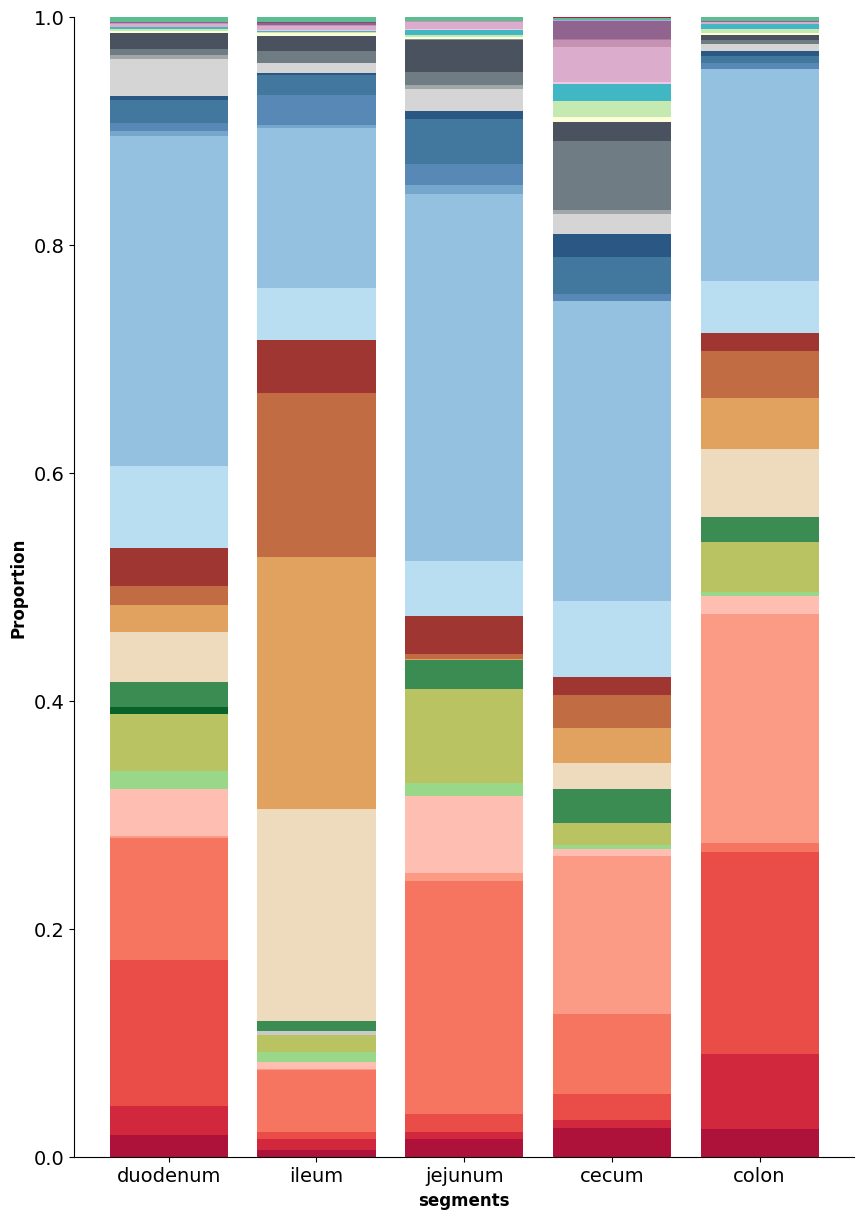

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义行和列的标签
cell_types = cell
segment_days = order
allcolors = dict(zip(cell, colors))
# 绘制堆叠条形图
fig, ax = plt.subplots(figsize=(10, 15))
bottom = np.zeros(len(segment_days))  # 记录每个细胞类型的堆叠起始位置

for i, cell_type in enumerate(cell):
    color = allcolors.get(cell_type, 'gray')
    plt.bar(df.columns, df.loc[cell_type], bottom=bottom, label=cell_type,color=color)
    bottom += df.loc[cell_type]

plt.xlabel('segments',fontsize=12, # High font size for style
         fontweight = 'bold',family='dejavu sans')
plt.ylabel('Proportion',fontsize=12, # High font size for style
         fontweight = 'bold',family='dejavu sans')

# # 将图例移到右侧，删除图例背景
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Remove the spines (border lines) from the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis() 
# 去除网格线
plt.grid(False)
plt.ylim(0, 1)  # 设置纵坐标范围为0-1
plt.savefig('/disk212/yupf/database/scRNA-seq/NewAtlas/figures/celltype_proportion_segment.pdf',dpi=300, bbox_inches='tight')
plt.show()

### 仔猪断奶免疫问题

In [63]:
T=adata[adata.obs['Lineage']=='T/ILC lineage']

In [85]:
T

AnnData object with n_obs × n_vars = 184349 × 19346
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Lineage', 'CellType', 'lym', 'level3', 'Dataset', 'segment', 'stage', 'weaned', 'Disease', 'gender', 'region', 'breed', 'project'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'CellType_colors', 'Lineage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'level3_colors', 'lym_colors', 'majority_voting_colors', 'neighbors', 'project_colors', 'tsne', 'umap'
    obsm: 'X_scVI', 'X_tsne', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [86]:
CellType=T.obs['CellType'].astype('category').cat.categories.to_list()

In [87]:
CellType

['CD4+ T cells',
 'CD8+ T cells',
 'MEF2C+ T cells',
 'Cytotoxic T cells',
 'ILC',
 'NK cells']

In [93]:
T.obs['stage']

AAACCCACAGTCGAGA-1_CNP0002165           180d
AAACGCTAGGGATCAC-1_CNP0002165           180d
AAACGCTGTCCCTCAT-1_CNP0002165           180d
AAAGAACGTAGAGACC-1_CNP0002165           180d
AAAGAACTCACTAGCA-1_CNP0002165           180d
                                        ... 
TTTGGAGTCATCCCGT-1_PRJNA859792_NoPP4     49d
TTTGTTGCAATCGCCG-1_PRJNA859792_NoPP4     49d
TTTGTTGGTACCTAGT-1_PRJNA859792_NoPP4     49d
TTTGTTGGTACTAAGA-1_PRJNA859792_NoPP4     49d
TTTGTTGTCAGTGTCA-1_PRJNA859792_NoPP4     49d
Name: stage, Length: 184349, dtype: category
Categories (14, object): ['0d', '1d', '3d', '5d', ..., '160d', '180d', '240d', 'adult']

In [88]:
T_color=['#b9ddf1','#94c1e0','#75a6cb','#5889b6','#42779e','#2a5783']

In [94]:
age_days=['1d','3d','7d','14d','21d','49d']

In [95]:
df = pd.DataFrame(index=CellType, columns=age_days)
for cell_type in CellType:
    for age in age_days:
        count = len(T.obs[(T.obs['CellType'] == cell_type) & (T.obs['stage'] == age)])
        proportion = count / len(T.obs[T.obs['stage'] == age])
        df.at[cell_type, age] = proportion

In [96]:

df=df[sub3]

In [97]:
df

1d        3d        7d       14d       21d       49d
CD4+ T cells       0.611827  0.180887  0.264222  0.260739  0.197768  0.060396
CD8+ T cells        0.11783  0.113311  0.441766  0.459021  0.690705  0.508442
MEF2C+ T cells     0.003557  0.009556  0.000299  0.000409  0.003108  0.032934
Cytotoxic T cells  0.014673  0.000683  0.017365  0.006818  0.017022  0.339187
ILC                0.236994   0.68942  0.186377  0.164462  0.069572  0.053726
NK cells           0.015118  0.006143   0.08997   0.10855  0.021825  0.005315

(0.0, 1.0)

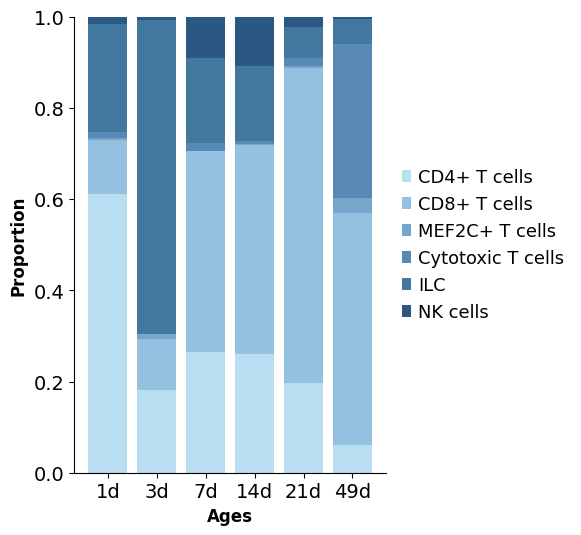

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义行和列的标签
cell_types = CellType
age_days = age_days
colors = dict(zip(cell_types, T_color))
# 绘制堆叠条形图
fig, ax = plt.subplots(figsize=(4, 6))
bottom = np.zeros(len(age_days))  # 记录每个细胞类型的堆叠起始位置

for i, cell_type in enumerate(cell_types):
    color = colors.get(cell_type, 'gray')
    plt.bar(df.columns, df.loc[cell_type], bottom=bottom, label=cell_type,color=color)
    bottom += df.loc[cell_type]

plt.xlabel('Ages',fontsize=12, # High font size for style
         fontweight = 'bold',family='dejavu sans')
plt.ylabel('Proportion',fontsize=12, # High font size for style
         fontweight = 'bold',family='dejavu sans')
# # 添加标题
# title = ' proportion(level2)'
# fig.text(0.4,0.95, # relative postion
#          title, 
#          fontsize=15, # High font size for style
#          fontweight = 'bold',
#          family='dejavu sans'
#         )
# 将图例移到右侧，删除图例背景
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Remove the spines (border lines) from the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 去除网格线
plt.grid(False)
plt.ylim(0, 1)  # 设置纵坐标范围为0-1
plt.savefig('/disk212/yupf/database/scRNA-seq/NewAtlas/figures/T_proportion.pdf',dpi=300, bbox_inches='tight')
# plt.show()

In [50]:
ax.invert_yaxis() 
fig.savefig('/disk212/yupf/database/scRNA-seq/NewAtlas/figures/T_proportion.pdf',dpi=300, bbox_inches='tight')

In [ ]:
sc.pp.neighbors(T, use_rep = 'X_scVI')
sc.tl.umap(T)
sc.pl.umap(T, color=['CellType','project'])

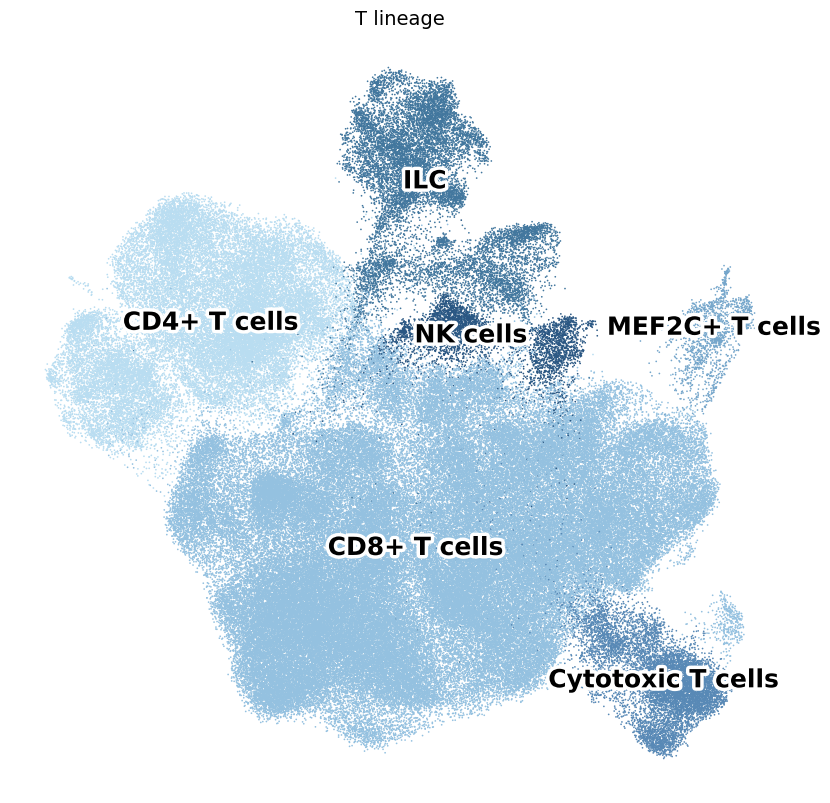

In [74]:
Tc=['#b9ddf1','#94c1e0','#75a6cb','#5889b6','#42779e','#2a5783']
sc.pl.umap(T, color='CellType',palette=Tc,legend_fontsize=18, legend_fontweight='bold', title='T lineage',legend_fontoutline=5,legend_loc='on data',size=6,frameon=False,save='_T.pdf')

In [103]:
CellType

['CD4+ T cells',
 'CD8+ T cells',
 'MEF2C+ T cells',
 'Cytotoxic T cells',
 'ILC',
 'NK cells']

In [104]:
ap={}
for i in CellType:
    ap[i]=T[T.obs['CellType']==i]

In [141]:
ap['MEF2C+ T cells'].obs['weaned'].value_counts()

after     1395
before     195
Name: weaned, dtype: int64

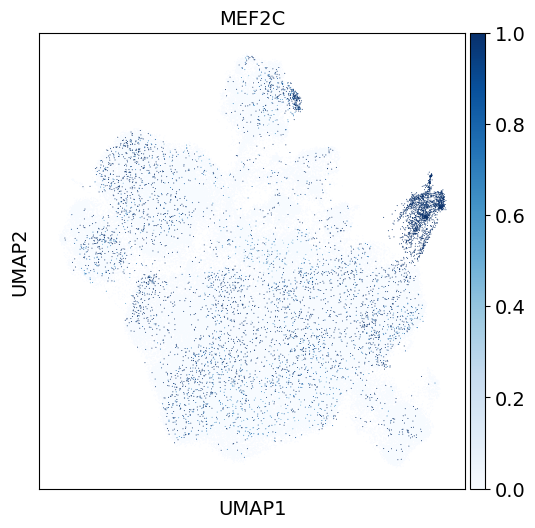

In [151]:
with plt.rc_context({'figure.figsize': [6, 6]}):
    sc.pl.umap(T,color='MEF2C',vmax=1,size=2,cmap='Blues')

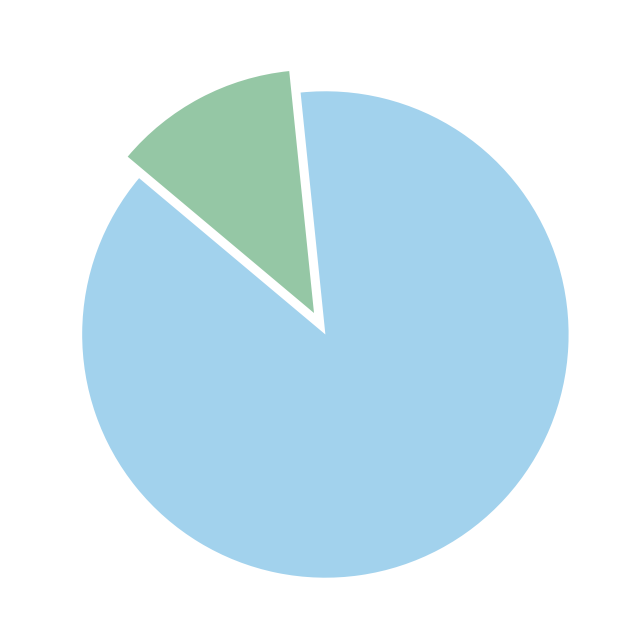

In [142]:
import matplotlib.pyplot as plt

# 示例数据
data = {'after weaned': 1395, 'before': 195}

# 提取标签和值
labels = list(data.keys())
values = list(data.values())

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(values, 
        colors=[ "#A2D2ED","#95C7A5" ],
        explode=(0.1,0),
        startangle=140)
# plt.title('MEF2C+ T cells weaned distribution')
plt.show()


In [99]:
T.obs['region'].value_counts()

SmallInt    119102
LargeInt     64397
Mixed          850
Name: region, dtype: int64

In [100]:
T.obs['weaned'].value_counts()

after     138063
before     41558
Name: weaned, dtype: int64

In [101]:
B.obs['region'].value_counts()

SmallInt    140935
LargeInt     24914
Mixed        10644
Name: region, dtype: int64

In [102]:
B.obs['weaned'].value_counts()

before    98412
after     67412
Name: weaned, dtype: int64

In [141]:
CD8=T[T.obs['CellType']=='CD8 T cells']

In [147]:
CD8=CD8[CD8.obs['stage'].isin(sub3)]

In [149]:
sc.tl.rank_genes_groups(CD8, groupby='stage', use_raw=None, reference='21d', key_added='CD8_21_14_rank')

/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


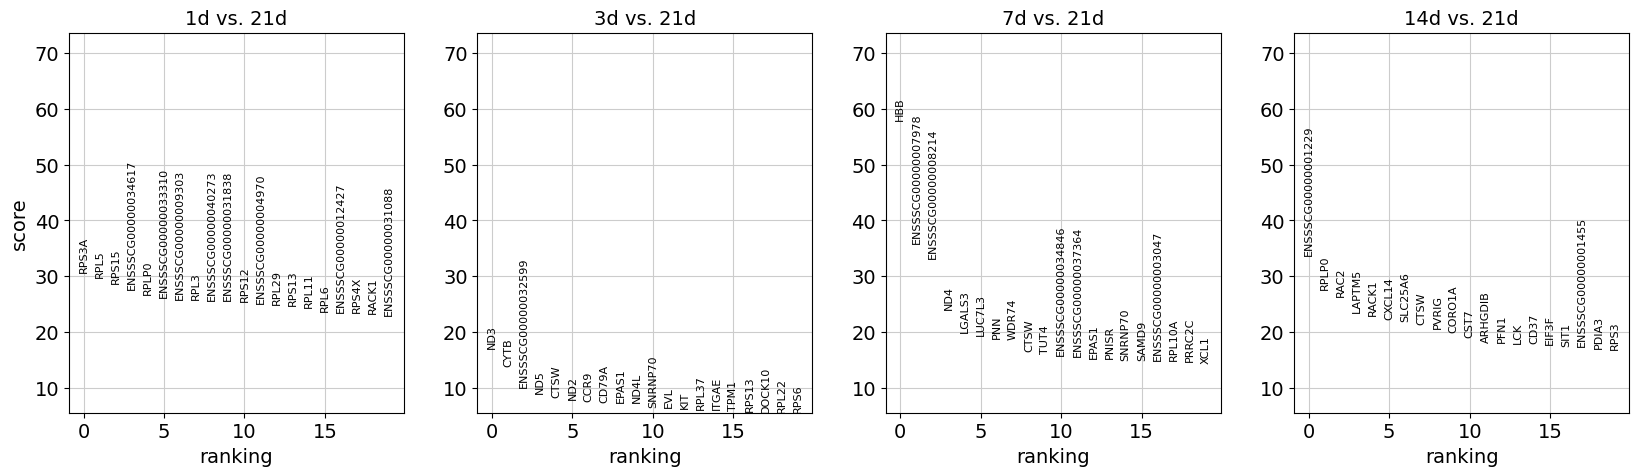

In [151]:
sc.pl.rank_genes_groups(CD8,key='CD8_21_14_rank')

In [153]:
markers = sc.get.rank_genes_groups_df(CD8,group='14d',key='CD8_21_14_rank')

In [155]:
significant_markers = markers[markers['pvals_adj'] < 0.05]

In [4]:
## B
B=adata[adata.obs['level3'].isin(['B cells','Plasma cells'])]

In [5]:
CellType=B.obs['CellType'].astype('category').cat.categories.to_list()

In [6]:
CellType

['Activated B cells', 'Cycling B cells', 'Resting B cells', 'Plasma cells']

In [8]:
stages=['Newborn', 'Piglet', 'Weaning', 'Weaner', 'Feeder', 'Adult']

In [79]:
ages=['1d','3d','7d','14d','21d','49d']

In [9]:
B

View of AnnData object with n_obs × n_vars = 176493 × 19346
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Lineage', 'CellType', 'lym', 'level3', 'Dataset', 'segment', 'stage', 'weaned', 'Disease', 'gender', 'region', 'breed', 'project', 'age'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'CellType_colors', 'Lineage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'level3_colors', 'lym_colors', 'majority_voting_colors', 'neighbors', 'project_colors', 'stage_colors', 'tsne', 'umap'
    obsm: 'X_scVI', 'X_tsne', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [81]:
sc.pp.neighbors(B, use_rep = 'X_scVI')
sc.tl.umap(B)
# sc.pl.umap(B, color=['CellType','project'])

In [13]:
B_color=['#eedbbd','#e1a25f','#c26c43','#9f3632']

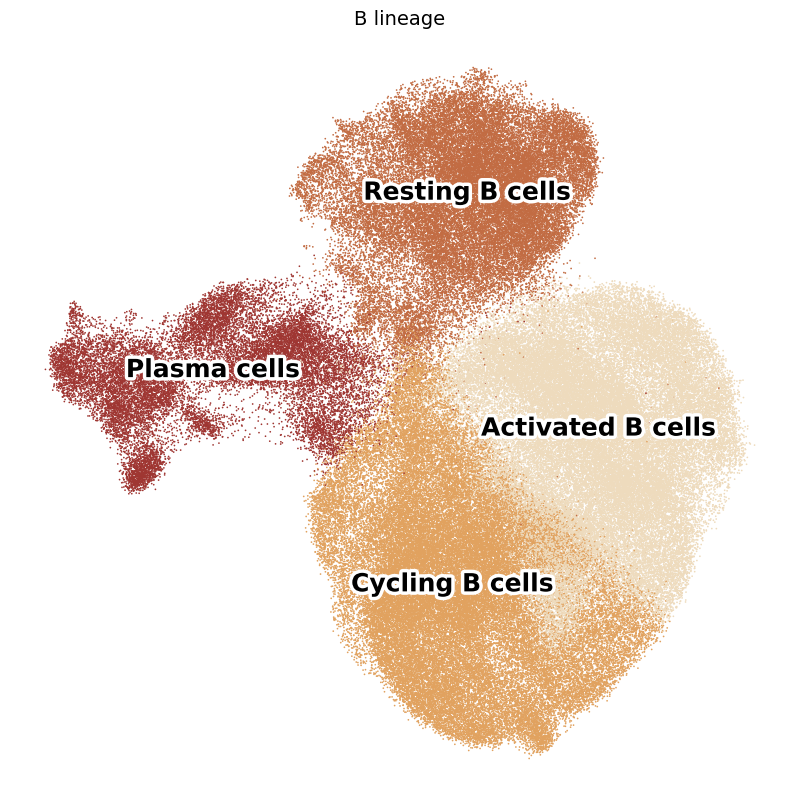

In [84]:
sc.pl.umap(B, color='CellType',palette=B_color,legend_fontsize=18, legend_fontweight='bold', title='B lineage',legend_fontoutline=5,legend_loc='on data',size=6,frameon=False,save='_B_ondata.pdf')

In [43]:
test=B[B.obs['stage'].isin(['0d','1d','3d','5d','7d','14d','21d','49d'])]

In [44]:
test

View of AnnData object with n_obs × n_vars = 104296 × 19346
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Lineage', 'CellType', 'lym', 'level3', 'Dataset', 'segment', 'stage', 'weaned', 'Disease', 'gender', 'region', 'breed', 'project'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Lineage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'level3_colors', 'lym_colors', 'majority_voting_colors', 'neighbors', 'project_colors', 'tsne', 'umap', 'CellType_colors'
    obsm: 'X_scVI', 'X_tsne', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [10]:
df = pd.DataFrame(index=CellType, columns=stages)
for cell_type in CellType:
    for age in stages:
        count = len(B.obs[(B.obs['CellType'] == cell_type) & (B.obs['stage'] == age)])
        proportion = count / len(B.obs[B.obs['stage'] == age])
        df.at[cell_type, age] = proportion

In [11]:
df

Newborn    Piglet   Weaning    Weaner    Feeder     Adult
Activated B cells  0.026289    0.2312   0.29642  0.393708  0.396107  0.443106
Cycling B cells    0.014048   0.24047  0.500047   0.27255  0.310197  0.297315
Resting B cells    0.950833  0.459465  0.091506  0.218213  0.125951  0.137276
Plasma cells        0.00883  0.068864  0.112027  0.115529  0.167744  0.122303

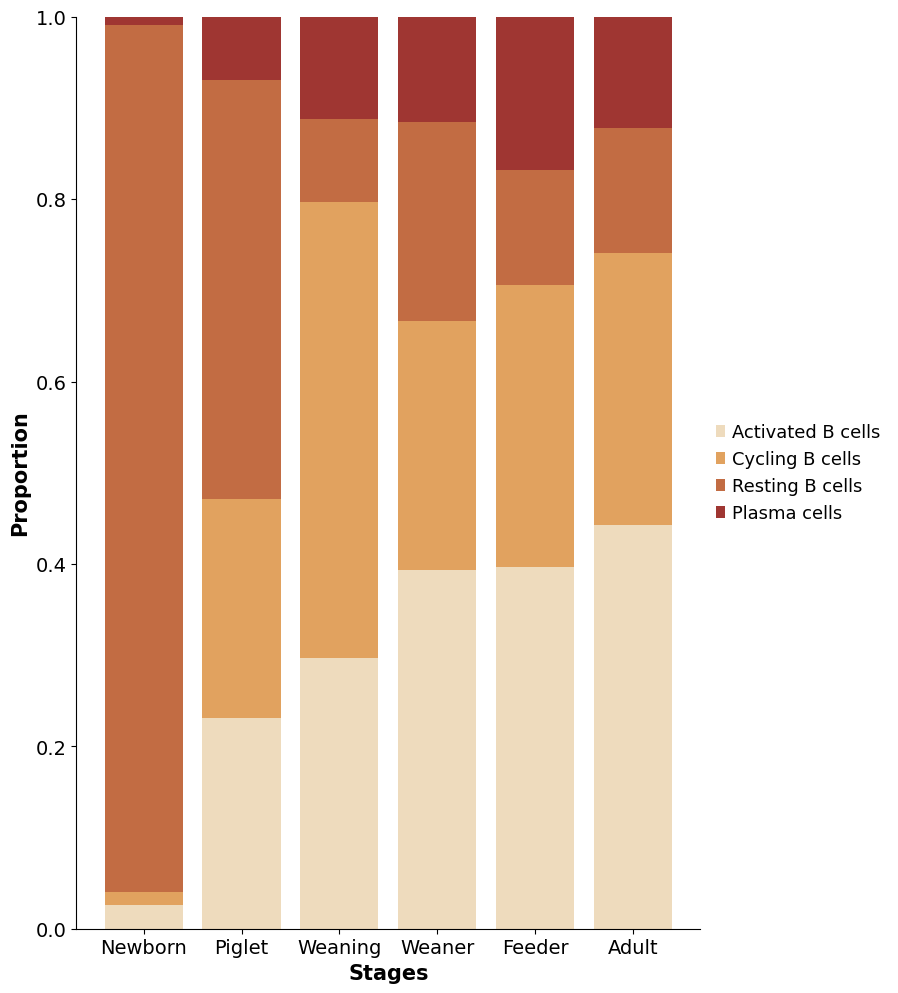

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义行和列的标签
cell_types = CellType
age_days = stages
colors = dict(zip(cell_types, B_color))
# 绘制堆叠条形图
fig, ax = plt.subplots(figsize=(8, 12))
bottom = np.zeros(len(age_days))  # 记录每个细胞类型的堆叠起始位置

for i, cell_type in enumerate(cell_types):
    color = colors.get(cell_type, 'gray')
    plt.bar(df.columns, df.loc[cell_type], bottom=bottom, label=cell_type,color=color)
    bottom += df.loc[cell_type]

plt.xlabel('Stages',fontsize=15, # High font size for style
         fontweight = 'bold',family='dejavu sans')
plt.ylabel('Proportion',fontsize=15, # High font size for style
         fontweight = 'bold',family='dejavu sans')
# # 添加标题
# title = ' proportion(level2)'
# fig.text(0.4,0.95, # relative postion
#          title, 
#          fontsize=15, # High font size for style
#          fontweight = 'bold',
#          family='dejavu sans'
#         )
# 将图例移到右侧，删除图例背景
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Remove the spines (border lines) from the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 去除网格线
plt.grid(False)
plt.ylim(0, 1)  # 设置纵坐标范围为0-1
plt.savefig('/disk212/yupf/database/scRNA-seq/NewAtlas/figures/B_proportion_stage.pdf',dpi=300, bbox_inches='tight')
# plt.show()

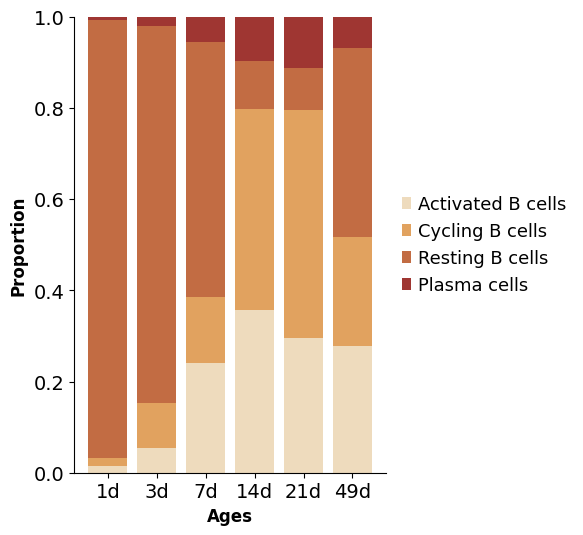

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 定义行和列的标签
cell_types = CellType
age_days = ages
colors = dict(zip(cell_types, B_color))
# 绘制堆叠条形图
fig, ax = plt.subplots(figsize=(4, 6))
bottom = np.zeros(len(age_days))  # 记录每个细胞类型的堆叠起始位置

for i, cell_type in enumerate(cell_types):
    color = colors.get(cell_type, 'gray')
    plt.bar(df.columns, df.loc[cell_type], bottom=bottom, label=cell_type,color=color)
    bottom += df.loc[cell_type]

plt.xlabel('Ages',fontsize=12, # High font size for style
         fontweight = 'bold',family='dejavu sans')
plt.ylabel('Proportion',fontsize=12, # High font size for style
         fontweight = 'bold',family='dejavu sans')
# # 添加标题
# title = ' proportion(level2)'
# fig.text(0.4,0.95, # relative postion
#          title, 
#          fontsize=15, # High font size for style
#          fontweight = 'bold',
#          family='dejavu sans'
#         )
# 将图例移到右侧，删除图例背景
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)

# Remove the spines (border lines) from the chart
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 去除网格线
plt.grid(False)
plt.ylim(0, 1)  # 设置纵坐标范围为0-1
plt.savefig('/disk212/yupf/database/scRNA-seq/NewAtlas/figures/B_proportion.pdf',dpi=300, bbox_inches='tight')
# plt.show()

In [42]:
B

AnnData object with n_obs × n_vars = 176493 × 19346
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Lineage', 'CellType', 'lym', 'level3', 'Dataset', 'segment', 'stage', 'weaned', 'Disease', 'gender', 'region', 'breed', 'project'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Lineage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'level3_colors', 'lym_colors', 'majority_voting_colors', 'neighbors', 'project_colors', 'tsne', 'umap', 'CellType_colors'
    obsm: 'X_scVI', 'X_tsne', 'X_umap', '_scvi_extra_categorical_covs'
    obsp: 'connectivities', 'distances'

In [ ]:
### RNA velocity

In [52]:
path='/disk212/yupf/database/scRNA-seq/fastq/PRJNA681248/PRJNA681248/'
list=['ileum0','ileum1','ileum3','ileum7','ileum14','ileum21']

In [50]:
B[B.obs['project']=='PRJNA681248_ileum0'].obs

doublet_score  predicted_doublet  \
AAACCCAAGCCGCACT-1_PRJNA681248_ileum0       0.018529              False   
AAACCCAGTGCTCTTC-1_PRJNA681248_ileum0       0.019994              False   
AAACGAATCTCCGATC-1_PRJNA681248_ileum0       0.015034              False   
AAACGCTAGCGTATGG-1_PRJNA681248_ileum0       0.039152              False   
AAAGGATCAACATACC-1_PRJNA681248_ileum0       0.015441              False   
...                                              ...                ...   
TTTGATCTCGTTGTTT-1_PRJNA681248_ileum0       0.021557              False   
TTTGGTTAGAAGCCAC-1_PRJNA681248_ileum0       0.018061              False   
TTTGTTGAGTATGAAC-1_PRJNA681248_ileum0       0.017602              False   
TTTGTTGCATTGGATC-1_PRJNA681248_ileum0       0.013480              False   
TTTGTTGTCATTACCT-1_PRJNA681248_ileum0       0.242525              False   

                                       n_genes  n_genes_by_counts  \
AAACCCAAGCCGCACT-1_PRJNA681248_ileum0      664                664   
AAACCCAGTGCTCTTC-1_PRJNA681248_ileum0     1143               1143   
AAACGAATCTCCGATC-1_PRJNA681248_ileum0      709                709   
AAACGCTAGCGTATGG-1_PRJNA681248_ileum0      394                394   
AAAGGATCAACATACC-1_PRJNA681248_ileum0     1268               1268   
...                                        ...                ...   
TTTGATCTCGTTGTTT-1_PRJNA681248_ileum0     1275               1275   
TTTGGTTAGAAGCCAC-1_PRJNA681248_ileum0      386                386   
TTTGTTGAGTATGAAC-1_PRJNA681248_ileum0     1147               1147   
TTTGTTGCATTGGATC-1_PRJNA681248_ileum0     1214               1214   
TTTGTTGTCATTACCT-1_PRJNA681248_ileum0     1327               1327   

                                       total_counts  total_counts_mt  \
AAACCCAAGCCGCACT-1_PRJNA681248_ileum0        1206.0            248.0   
AAACCCAGTGCTCTTC-1_PRJNA681248_ileum0        3722.0            106.0   
AAACGAATCTCCGATC-1_PRJNA681248_ileum0        1393.0             81.0   
AAACGCTAGCGTATGG-1_PRJNA681248_ileum0         693.0            231.0   
AAAGGATCAACATACC-1_PRJNA681248_ileum0        3459.0            201.0   
...                                             ...              ...   
TTTGATCTCGTTGTTT-1_PRJNA681248_ileum0        3808.0            234.0   
TTTGGTTAGAAGCCAC-1_PRJNA681248_ileum0         621.0            166.0   
TTTGTTGAGTATGAAC-1_PRJNA681248_ileum0        3346.0            210.0   
TTTGTTGCATTGGATC-1_PRJNA681248_ileum0        3193.0            197.0   
TTTGTTGTCATTACCT-1_PRJNA681248_ileum0        4290.0            861.0   

                                       pct_counts_mt   S_score  G2M_score  \
AAACCCAAGCCGCACT-1_PRJNA681248_ileum0      20.563847 -0.109438   0.055193   
AAACCCAGTGCTCTTC-1_PRJNA681248_ileum0       2.847931  0.055072  -0.076450   
AAACGAATCTCCGATC-1_PRJNA681248_ileum0       5.814788 -0.022972   0.088152   
AAACGCTAGCGTATGG-1_PRJNA681248_ileum0      33.333336 -0.076850  -0.094198   
AAAGGATCAACATACC-1_PRJNA681248_ileum0       5.810928 -0.026314   0.024316   
...                                              ...       ...        ...   
TTTGATCTCGTTGTTT-1_PRJNA681248_ileum0       6.144958 -0.112274  -0.088237   
TTTGGTTAGAAGCCAC-1_PRJNA681248_ileum0      26.731079 -0.096578  -0.132058   
TTTGTTGAGTATGAAC-1_PRJNA681248_ileum0       6.276151 -0.069740  -0.048682   
TTTGTTGCATTGGATC-1_PRJNA681248_ileum0       6.169746 -0.103966  -0.099050   
TTTGTTGTCATTACCT-1_PRJNA681248_ileum0      20.069929 -0.003918  -0.097653   

                                      phase  ...   level3             Dataset  \
AAACCCAAGCCGCACT-1_PRJNA681248_ileum0   G2M  ...  B cells  PRJNA681248_ileum0   
AAACCCAGTGCTCTTC-1_PRJNA681248_ileum0     S  ...  B cells  PRJNA681248_ileum0   
AAACGAATCTCCGATC-1_PRJNA681248_ileum0   G2M  ...  B cells  PRJNA681248_ileum0   
AAACGCTAGCGTATGG-1_PRJNA681248_ileum0    G1  ...  B cells  PRJNA681248_ileum0   
AAAGGATCAACATACC-1_PRJNA681248_ileum0   G2M  ...  B cells  PRJNA681248_ileum0   
...                              

In [75]:
# ap={}
# for i in list:
#     fpath=path+i+f'/velocyto/{i}.loom'
#     ap[i]=sc.read_loom(fpath)
#     ap[i].var_names_make_unique()
#     ap[i].obs_names_make_unique()
#     df = ap[i].obs
#     # 提取 index 中的子字符串
#     new_index = df.index.str.extract('(?<=:)(.*)(?=x)', expand=False)
#     # 添加后缀并赋值给新的 index
#     df.index = new_index + '-1'
#     ap[i].obs=df
#     x=['{}',"PRJNA681248_"+i]
#     ap[i].obs.index=ap[i].obs.index.map('_'.join(x).format)#每个barcode
B_velo=sc.concat(ap.values(),keys=ap.keys(),label='project')
# B_velo.write('/disk212/yupf/database/scRNA-seq/NewAtlas/velocyto/B_velo_concat.h5ad')

In [76]:
B_velo

AnnData object with n_obs × n_vars = 92365 × 21691
    obs: 'project'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'

In [56]:
B_velo.obs

project
CellID                                         
AAACGAATCAAATGAG-1_PRJNA681248_ileum0    ileum0
AAAGTGACACCTTCCA-1_PRJNA681248_ileum0    ileum0
AAACGAAGTTGCCGAC-1_PRJNA681248_ileum0    ileum0
AAAGGGCGTCAATCTG-1_PRJNA681248_ileum0    ileum0
AAACCCATCAAGAGGC-1_PRJNA681248_ileum0    ileum0
...                                         ...
TTTGTTGTCACCCTGT-1_PRJNA681248_ileum21  ileum21
TTTGGTTAGTACAGCG-1_PRJNA681248_ileum21  ileum21
TTTGTTGTCGCAATGT-1_PRJNA681248_ileum21  ileum21
TTTGACTAGAGCGACT-1_PRJNA681248_ileum21  ileum21
TTTGACTAGTCACTAC-1_PRJNA681248_ileum21  ileum21

[92365 rows x 1 columns]

In [77]:
B_velo=B_velo[B_velo.obs_names.isin(B.obs_names)]#将B_velo的细胞名统一
B_velo=B_velo[:, B.var_names]#将B_velo的基因名统一
B_new=B[B.obs_names.isin(B_velo.obs_names)]#将B与B_velo统一
B_new.layers=B_velo.layers

In [78]:
B_new

AnnData object with n_obs × n_vars = 53198 × 19346
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Lineage', 'CellType', 'lym', 'level3', 'Dataset', 'segment', 'stage', 'weaned', 'Disease', 'gender', 'region', 'breed', 'project'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Lineage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'level3_colors', 'lym_colors', 'majority_voting_colors', 'neighbors', 'project_colors', 'tsne', 'umap', 'CellType_colors'
    obsm: 'X_scVI', 'X_tsne', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [34]:
import scvelo as scv

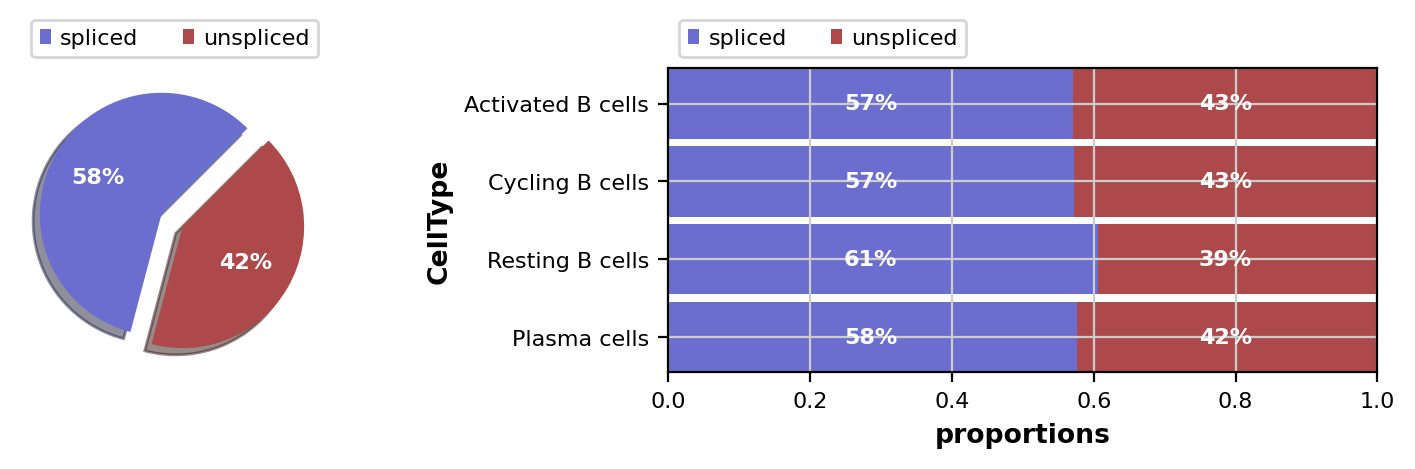

In [81]:
scv.pl.proportions(B_new,groupby='CellType')

In [82]:
scv.pp.filter_and_normalize(B_new, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(B_new, n_pcs=30, n_neighbors=30)

Filtered out 9718 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:19) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:14) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [84]:
scv.tl.recover_dynamics(B_new,n_jobs=30)

recovering dynamics (using 30/128 cores)


  0%|          | 0/250 [00:00<?, ?gene/s]

    finished (0:04:54) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [85]:
scv.tl.velocity(B_new, mode='dynamical')
scv.tl.velocity_graph(B_new,n_jobs=30)

computing velocities
    finished (0:00:46) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/128 cores)


  0%|          | 0/53198 [00:00<?, ?cells/s]

    finished (0:01:48) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [86]:
B_new

AnnData object with n_obs × n_vars = 53198 × 2000
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Lineage', 'CellType', 'lym', 'level3', 'Dataset', 'segment', 'stage', 'weaned', 'Disease', 'gender', 'region', 'breed', 'project', 'initial_size_unspliced', 'initial_size_spliced', 'initial_size', 'n_counts', 'velocity_self_transition'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'fit_r2', 'fit_alpha', 'fit_beta', 'fit_gamma', 'fit_t_', 'fit_scaling', 'fit_std_u', 'fit_std_s', 'fit_likelihood', 'fit_u0', 'fit_s0', 'fit_pval_steady', 'fit_steady_u', 'fit_steady_s', 'fit_variance', 'fit_alignment_scaling', 'velocity_genes'
    uns: 'Lineage_colors', '_scvi_manager_uuid', '_scvi_uu

In [31]:
import seaborn as sns

<Figure size 150x150 with 0 Axes>

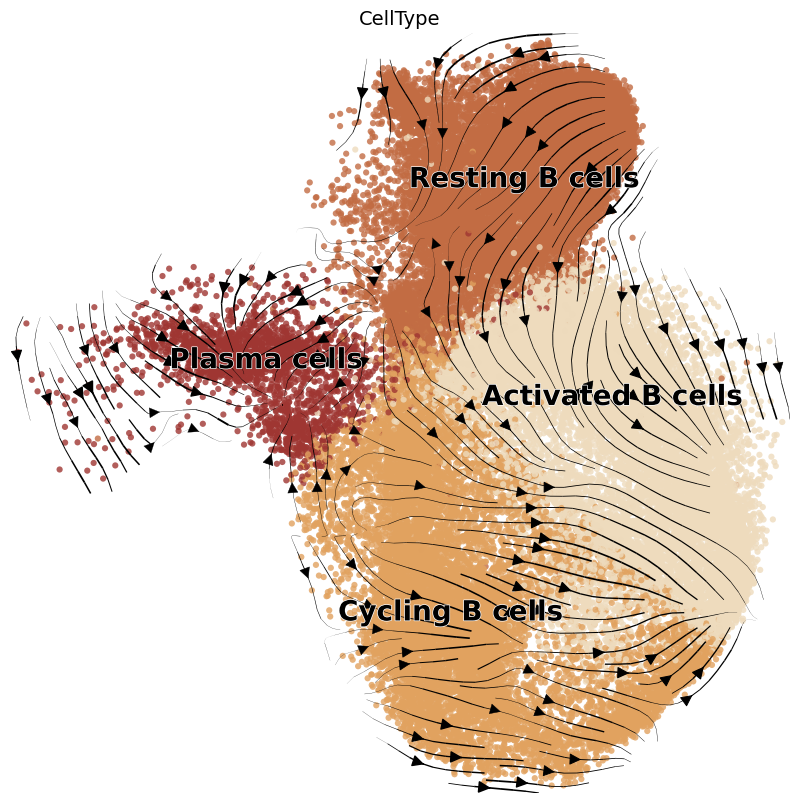

In [46]:
plt.figure(figsize=(3, 3))
scv.pl.velocity_embedding_stream(B_new, basis='X_umap',color='CellType',legend_fontsize=20,arrow_size=1.8,size=80,alpha=0.8,show=False)
plt.grid(False)
plt.savefig('/disk212/yupf/database/scRNA-seq/NewAtlas/figures/velocyto_B.PNG',dpi=300, bbox_inches='tight')

In [109]:
import cairosvg
svg_file = '/disk212/yupf/database/scRNA-seq/NewAtlas/figures/velocyto_B.svg'
pdf_file = '/disk212/yupf/database/scRNA-seq/NewAtlas/figures/velocyto_B.pdf'
cairosvg.svg2pdf(url=svg_file, write_to=pdf_file)

/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)


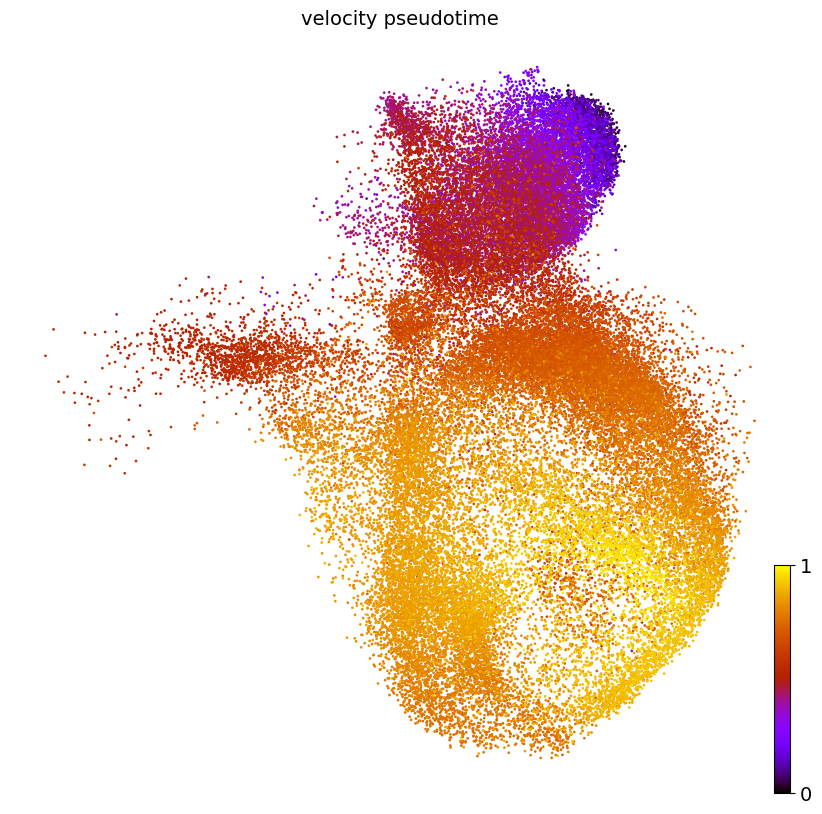

In [122]:
# scv.tl.velocity_pseudotime(B_new)
fig=scv.pl.scatter(B_new, color='velocity_pseudotime', cmap='gnuplot',size=15,show=False)
fig.grid(False)
fig = fig.get_figure()
fig.savefig('/disk212/yupf/database/scRNA-seq/NewAtlas/figures/pseudotime_B.pdf',dpi=300, bbox_inches='tight')

In [ ]:
scv.tl.rank_velocity_genes(B_new, groupby='CellType', min_corr=.3)

df = scv.DataFrame(B_new.uns['rank_velocity_genes']['names'])
df.head()

In [134]:
B_new.obs['project']

AAACCCAAGCCGCACT-1_PRJNA681248_ileum0      PRJNA681248_ileum0
AAACCCAGTGCTCTTC-1_PRJNA681248_ileum0      PRJNA681248_ileum0
AAACGAATCTCCGATC-1_PRJNA681248_ileum0      PRJNA681248_ileum0
AAACGCTAGCGTATGG-1_PRJNA681248_ileum0      PRJNA681248_ileum0
AAAGGATCAACATACC-1_PRJNA681248_ileum0      PRJNA681248_ileum0
                                                 ...         
TTTGTTGGTGGGACAT-1_PRJNA681248_ileum21    PRJNA681248_ileum21
TTTGTTGTCAACACCA-1_PRJNA681248_ileum21    PRJNA681248_ileum21
TTTGTTGTCACCCTGT-1_PRJNA681248_ileum21    PRJNA681248_ileum21
TTTGTTGTCCGAGATT-1_PRJNA681248_ileum21    PRJNA681248_ileum21
TTTGTTGTCTGTAACG-1_PRJNA681248_ileum21    PRJNA681248_ileum21
Name: project, Length: 53198, dtype: category
Categories (6, object): ['PRJNA681248_ileum0', 'PRJNA681248_ileum1', 'PRJNA681248_ileum3', 'PRJNA681248_ileum7', 'PRJNA681248_ileum14', 'PRJNA681248_ileum21']

In [26]:
# B_new.write('/disk212/yupf/database/scRNA-seq/NewAtlas/velocyto/B_velo.h5ad')
B_new=sc.read_h5ad('/disk212/yupf/database/scRNA-seq/NewAtlas/velocyto/B_velo.h5ad')

### 21d RNA velo

In [147]:
B_velo=B_velo[B_velo.obs_names.isin(B.obs_names)]#将B_velo的细胞名统一
B_velo=B_velo[:, B.var_names]#将B_velo的基因名统一
B_new=B[B.obs_names.isin(B_velo.obs_names)]#将B与B_velo统一
B_new.layers=B_velo.layers

In [148]:
B_21=B_new[B_new.obs['project']=='PRJNA681248_ileum21']

In [149]:
B_21

View of AnnData object with n_obs × n_vars = 13317 × 19346
    obs: 'doublet_score', 'predicted_doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'S_score', 'G2M_score', 'phase', '_scvi_batch', '_scvi_labels', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Lineage', 'CellType', 'lym', 'level3', 'Dataset', 'segment', 'stage', 'weaned', 'Disease', 'gender', 'region', 'breed', 'project'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Lineage_colors', '_scvi_manager_uuid', '_scvi_uuid', 'hvg', 'leiden', 'leiden_colors', 'level3_colors', 'lym_colors', 'majority_voting_colors', 'neighbors', 'project_colors', 'tsne', 'umap', 'CellType_colors'
    obsm: 'X_scVI', 'X_tsne', 'X_umap', '_scvi_extra_categorical_covs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [150]:
scv.pp.filter_and_normalize(B_21, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(B_21, n_pcs=30, n_neighbors=30)

Filtered out 11768 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
computing neighbors
    finished (0:00:06) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:04) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [151]:
scv.tl.recover_dynamics(B_21,n_jobs=30)

recovering dynamics (using 30/128 cores)


  0%|          | 0/25 [00:00<?, ?gene/s]

    finished (0:00:14) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)


In [152]:
scv.tl.velocity(B_21, mode='dynamical')
scv.tl.velocity_graph(B_21,n_jobs=30)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 30/128 cores)


  0%|          | 0/13317 [00:00<?, ?cells/s]

    finished (0:00:15) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [162]:
scv.tl.rank_velocity_genes(B_21, groupby='CellType', min_corr=.3)

df = scv.DataFrame(B_21.uns['rank_velocity_genes']['names'])
df.head()

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


/tmp/ipykernel_2451021/3288234209.py:3: DeprecationWarning: `scvelo.read_load.get_df` is deprecated since scVelo v0.2.4 and will be removed in a future version. Please use `scvelo.core.get_df` instead.
  df = scv.DataFrame(B_21.uns['rank_velocity_genes']['names'])


Activated B cells     Cycling B cells     Resting B cells  \
0  ENSSSCG00000040752  ENSSSCG00000009327               CENPF   
1               TOP2A               CENPF  ENSSSCG00000040752   
2                 DUT                PTMA  ENSSSCG00000009327   
3                PTMA                 DUT               TOP2A   
4               CENPF               TOP2A                PTMA   

         Plasma cells  
0                 DUT  
1  ENSSSCG00000009327  
2                PTMA  
3               CENPF  
4               TOP2A

/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)
/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation, cax=cax)
/disk211/public/anaconda3/envs/labBase/lib/python3.8/site-packages/scvelo/plotting/utils.py:866: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = pl.colorbar(smp, orientation=orientation

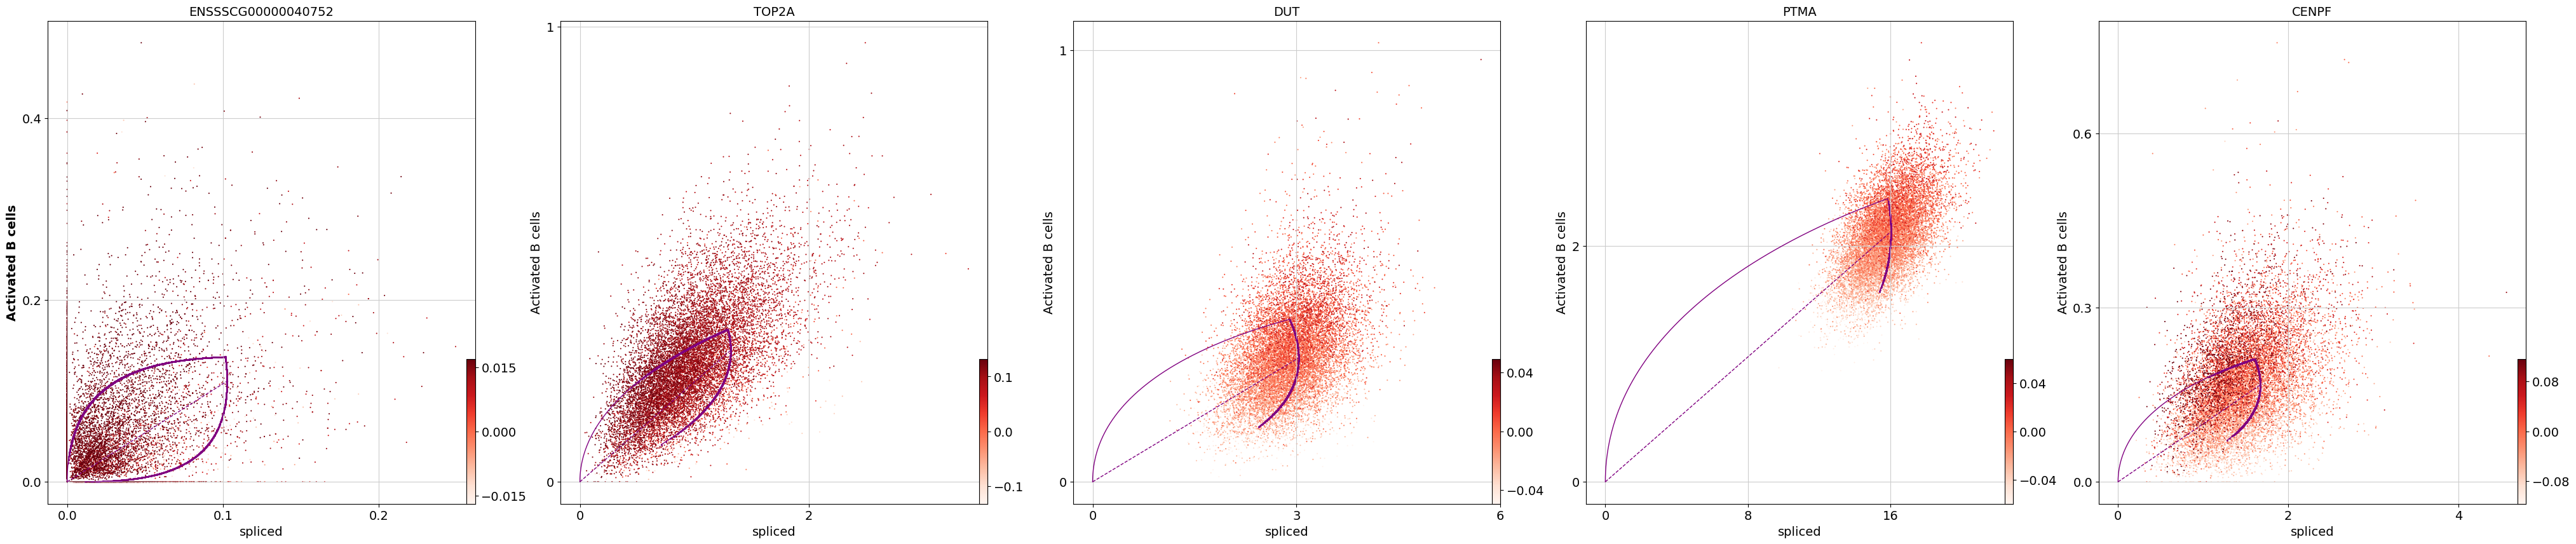

In [158]:
kwargs = dict(frameon=False, size=30, linewidth=1.5,
              add_outline='Activated B cells, Cycling B cells, Resting B cells,Plasma cells')

scv.pl.scatter(B_21, df['Activated B cells'][:5],color='velocity', ylabel='Activated B cells')
# scv.pl.scatter(B_21, df['Cycling B cells'][:5], ylabel='Cycling B cells')
# scv.pl.scatter(B_21, df['Resting B cells'][:5], ylabel='Resting B cells')
# scv.pl.scatter(B_21, df['Plasma cells'][:5], ylabel='Plasma cells')